# Homework 1: Greenhouse Gases and Climate change

#### Deadline: Monday 14 October 2024 (by 5pm)

#### Credits: 20 points

## Name: Alan Israel Palma Travez

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec



- This homework is individual. Please include your name in the notebook.



- Within a **single python notebook**, solve the following problems:

## Problem 1. (9 points) Data I/O and regression: $\rm CO_2$ emission

This problem consists of reading, displaying, analysing, and modelling $\rm CO_2$ concentration data from a monitoring station located in Kennaook/Cape Grim, Australia.

The data files for this and the next exercises were downloaded from the CSIRO site:

https://www.csiro.au/en/research/natural-environment/atmosphere/Latest-greenhouse-gas-data

For this problem, you will use the following CSV file:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_CO2_data_download.csv


### Tasks:

(a) Inspect the structure of the file. Then, create a python function that uses **pandas** to read in the **CapeGrim_CO2_data_download.csv** file, skips the header, place the data into a pandas dataframe, and returns 3 columns as arrays, namely: "DATE", "CO2(ppm)", "SD(ppm)". The first one has the data collection times, the second one contains $\rm CO_2$ concentrations in $\rm ppm$, and the third one has the respective instrumental standard deviations also in $\rm ppm$.

(b) Now, you will rescale the uncertainties to more realistic values by multiplying the instrumental standard deviation by $10$, so $\sigma=10\,\sigma_{\rm instrumental}$. The instrumental uncertainties are very small, and there are unaccounted-for errors, such as systematic errors. A factor of $\sim 10$ is a fine estimate for this data set.

(c) Make a high-quality, labeled plot of the $\rm CO_2$ concentrations (in $\rm ppm$) versus time, including the y-error bars equal to the uncertainties calculated in (b).

(d) How monotonic and linear is the relation between the two variables?

(e) Now, you will carry out a regression on the data, assuming a simple linear regression model (**"Model 1"**) with 2 free parameters. Carry out a $\chi^2$ minimisation, and report the resulting equation and figure. The figure should have a high-quality, labeled plot of the original data with error bars and the resulting best-fit line.

(f) To perform a goodness-of-fit test, create a python function that calculates the global $\chi^2$ statistic, the number of degrees of freedom, and the reduced $\chi^2$ statistic. Briefly comment on your findings, is the linear model a good model?

(g) Next, you can propose your own model (**"Model 2"**) for the data. Motivate and write down your model. Then, repeat steps (e) and (f) for your model and compare the reduced $\chi^2$ statistic with that of the linear model. Which model is better? Hint: Keep the model simple with maximum 2 free parameters and avoid overfitting.

(h) Finally, you will construct **2D confidence intervals** using the $\chi^2$ statistic evaluated in the vicinity of the best-fit values for the free parameters of Models 1 and 2. Since both models have two free parameters, you should create python functions that compute and return the 2D $\chi^2$ surface of each model onto the respective parameter space. Hints: to create a 2D parameter space as a meshgrid, you should first create vectors with numbers around the best-fit values found in your regressions. 1D plots showing $\chi^2$ as a function of each parameter may help identify optimal numbers.

(i) Make a high-quality, labeled, multi-panel figure showing the 2D $\chi^2$ surface of each model: first in 3D, and then in projection with a marker showing the minimum and overimposed contours indicating at least two confidence levels. Briefly comment on your results highlighting the differences between the confidence intervals of both models. What do these confidence intervals tell us? Hint: the maps should have one of the free parameters in the X axis, the other free parameter in the Y axis, and the $\chi^2$ surface in the Z axis.

## Solution

In [2]:
#Third party libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as st

(a) Inspect the structure of the file. Then, create a python function that uses **pandas** to read in the **CapeGrim_CO2_data_download.csv** file, skips the header, place the data into a pandas dataframe, and returns 3 columns as arrays, namely: "DATE", "CO2(ppm)", "SD(ppm)". The first one has the data collection times, the second one contains $\rm CO_2$ concentrations in $\rm ppm$, and the third one has the respective instrumental standard deviations also in $\rm ppm$.

In [3]:
#Create to fuction for a)

def read_data(path):

  """
  Function to extract two columns of a data file (.csv)
  Input: 
    - path: directory of the file to read the data 
  Output:
    - new_data_frame: Pandas data frame with three columns (PD object)
  Author: Alan Palma
  """
    
  data_frame = pd.read_csv(path, sep = ",") #Read de file from the path.
  data_frame = data_frame.loc[24:,:] #Avoid the first lines that we do not need.

  new_data_frame = pd.DataFrame({"DATE": np.array(data_frame["Unnamed: 3"], dtype = float), #Covert the three first colums as a new pandas data frame
                    "CO2(ppm)": np.array(data_frame["Unnamed: 4"], dtype = float),
                    "SD(ppm)": np.array(data_frame["Unnamed: 5"], dtype = float)})
  
  return new_data_frame

In [4]:
path = "CapeGrim_CO2_data_download.csv"

#Call the function to egt the data

data_frame = read_data(path)

#Extract the columns

co2_conc = np.array(data_frame["CO2(ppm)"])
std = np.array(data_frame["SD(ppm)"])
date = np.array(data_frame["DATE"])

print(data_frame)

           DATE  CO2(ppm)  SD(ppm)
0    1976.36890   328.861    0.165
1    1976.45360   328.988    0.285
2    1976.53550   329.653    0.282
3    1976.62020   330.550    0.201
4    1976.70490   330.872    0.234
..          ...       ...      ...
575  2024.28689   419.037    0.219
576  2024.36885   419.501    0.215
577  2024.45355   420.040    0.216
578  2024.53552   420.472    0.146
579  2024.62022   420.816    0.152

[580 rows x 3 columns]


(b) Now, you will rescale the uncertainties to more realistic values by multiplying the instrumental standard deviation by $10$, so $\sigma=10\,\sigma_{\rm instrumental}$. The instrumental uncertainties are very small, and there are unaccounted-for errors, such as systematic errors. A factor of $\sim 10$ is a fine estimate for this data set.

In [5]:
#Rescale the uncertainties column

std_10 = std*10

#print(data_frame)

(c) Make a high-quality, labeled plot of the $\rm CO_2$ concentrations (in $\rm ppm$) versus time, including the y-error bars equal to the uncertainties calculated in (b).

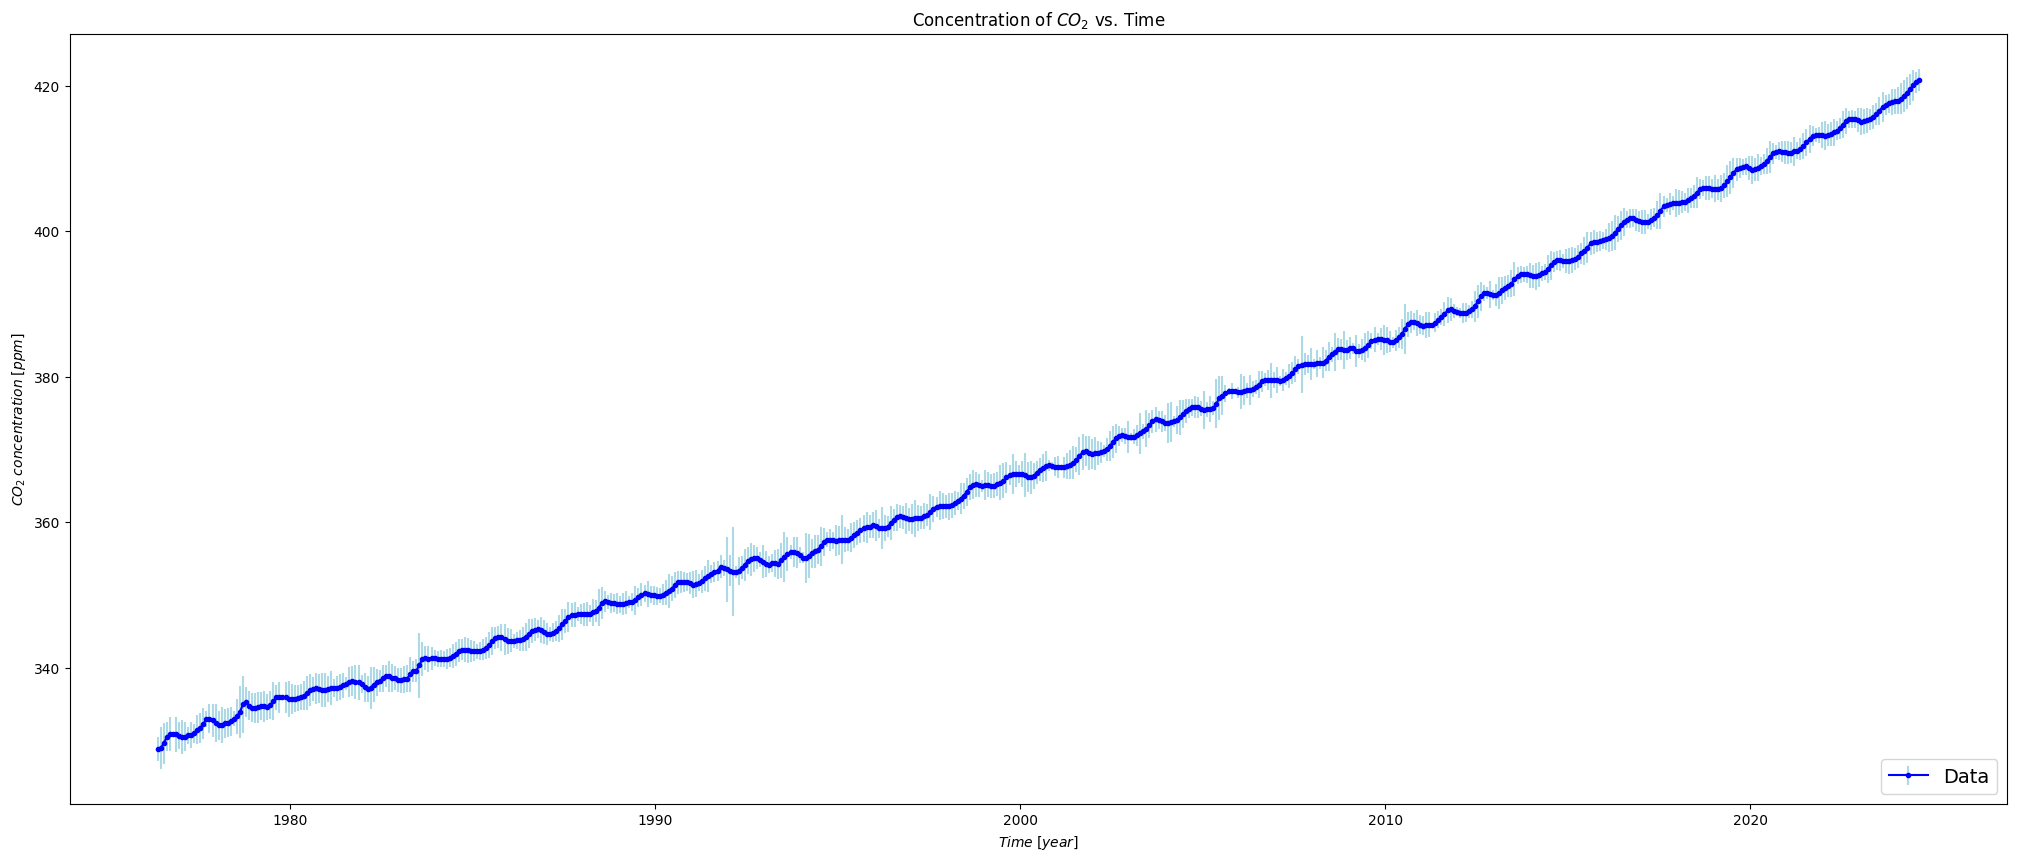

In [6]:
#Plotting 

plt.figure(figsize=(25,10))

plt.title(r"Concentration of $CO_2$ vs. Time")
plt.ylabel(r"$CO_2 \; concentration \; [ppm]$")
plt.xlabel(r"$Time \; [year]$")

plt.errorbar(date, co2_conc, std_10, 0, marker = ".", linestyle = "-", ecolor="lightblue", 
             color = "Blue", label = "Data" )

plt.legend(loc = 4, fontsize = 14)

plt.show()

(d) How monotonic and linear is the relation between the two variables?

In [7]:
# Spearman coefficient to evaluate monoticity

sp = st.spearmanr(date, co2_conc)
print(sp)

SignificanceResult(statistic=0.99979570134535, pvalue=0.0)


Since the spearman coeffiecient is about 0.99 so the data has positive ordinal correlation. THis can easily seen from the figure above, since in general the $CO_2$ concentration increases with time. 


(e) Now, you will carry out a regression on the data, assuming a simple linear regression model (**"Model 1"**) with 2 free parameters. Carry out a $\chi^2$ minimisation, and report the resulting equation and figure. The figure should have a high-quality, labeled plot of the original data with error bars and the resulting best-fit line.

In [8]:
#Fisrt regression model

#Objective function 1
def model_1(time, a, b):
    """
    Function to model a typical linear equation (a*t+b)
    Author: Alan Palma
    """

    conc = a*time+b

    return conc


#Carry out the regression
coef_chi, cova_chi = opt.curve_fit(model_1, date, co2_conc, sigma = std_10)

coef_unc = np.sqrt(np.diag(cova_chi))


#print(np.sqrt(np.diag(cova_chi)))

In [9]:
#Report the regretion 

print(f"The regression for model 1 is: Concetration of CO2 = {'%.5f' % coef_chi[0]}*t {'%.5f' % coef_chi[1]}\n")

print("The uncertainty for the coefficients a, and b (a*t+b) are:")
print(f"a = {'%.5f' % coef_chi[0]} +/- {'%.5f' % coef_unc[0]}")
print(f"b = {'%.5f' % coef_chi[1]} +/- {'%.5f' % coef_unc[1]}")

The regression for model 1 is: Concetration of CO2 = 1.75336*t -3137.55224

The uncertainty for the coefficients a, and b (a*t+b) are:
a = 1.75336 +/- 0.00718
b = -3137.55224 +/- 14.35220


In [10]:
#Let's evaluate the model 

time_arr = np.linspace(date[0], date[-1], len(date))

co2_fit = model_1(time_arr, *coef_chi)

print(time_arr.shape, co2_fit.shape)

(580,) (580,)


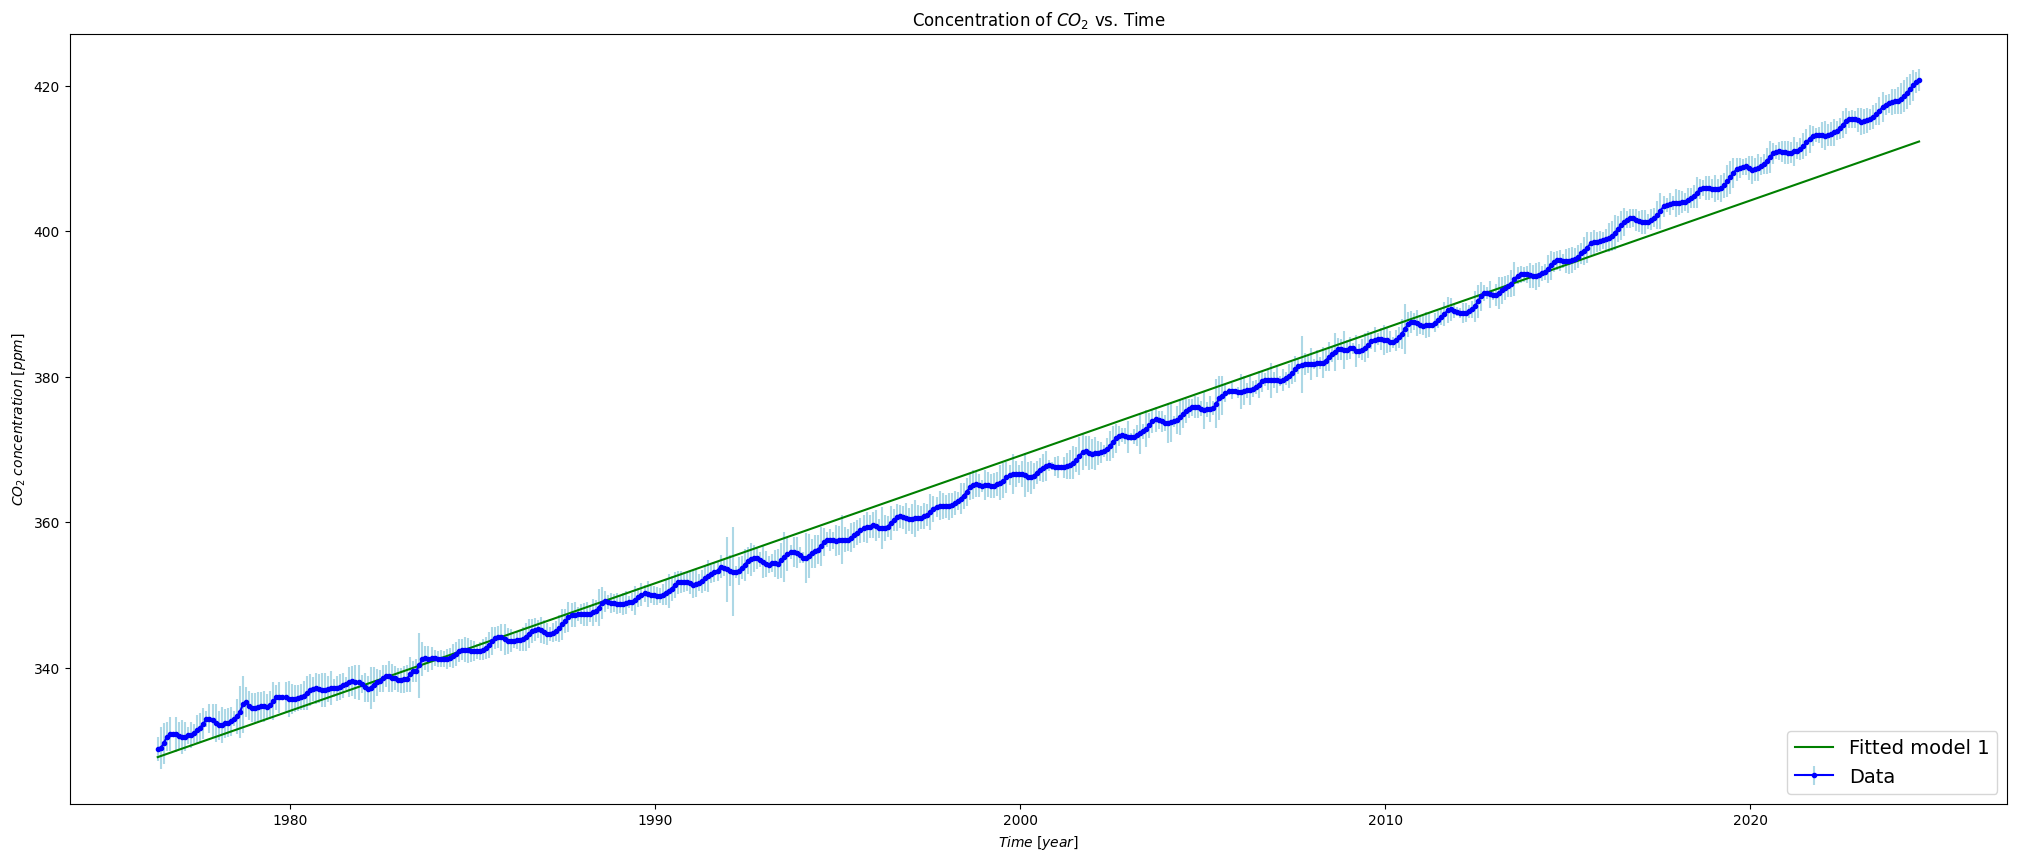

In [11]:
#Plotting

plt.figure(figsize=(25,10))

plt.title(r"Concentration of $CO_2$ vs. Time")
plt.ylabel(r"$CO_2 \; concentration \; [ppm]$")
plt.xlabel(r"$Time \; [year]$")

plt.errorbar(date, co2_conc, std_10, 0, marker = ".", linestyle = "-", ecolor="lightblue", 
             color = "Blue", label = "Data" )
plt.plot(time_arr, co2_fit, color = "green", linestyle = "-", label = "Fitted model 1" )

plt.legend(loc = 4, fontsize = 14)

plt.show()


(f) To perform a goodness-of-fit test, create a python function that calculates the global $\chi^2$ statistic, the number of degrees of freedom, and the reduced $\chi^2$ statistic. Briefly comment on your findings, is the linear model a good model?

In [12]:
# Define a functional/chi^2 statistic

def chi_sqr_stats(fex, fit, sigma, coef):
    """
    Fuction to compute the chi suare statistics 
    Inputs: 
        fex: experimal data values (1D array, float)
        fit: teorical values from a fitted model (1D array, float)
        sigma: 1D array with the standard deviations (1D array, float)
        coef: array with the free parametes (1D array, float)
    Outputs: 
        chi_sqr: chi square statistic
        chi_sqr_red: reduced chi square
        nu: number of degrees of freedom
    """
    
    #Use the chi^2 formula
    chi_sqr = np.sum((fex - fit)**2/(sigma)**2)

    #Get the number of degrees of freedom 
    nu = len(fex)-len(coef)

    #Reduced chi^2 stats:
    chi_sqr_red = chi_sqr/nu
    
    return chi_sqr, chi_sqr_red, nu

In [13]:
#Call the function to get the statistics for the fitted model 1 (linear)

chi_sqr, chi_sqr_red, nu = chi_sqr_stats(co2_conc, co2_fit, std_10, coef_chi)

print(f"Chi square = {chi_sqr}")
print(f"Chi square reduced = {chi_sqr_red}")
print(f"Degrees of freedom = {nu}")


Chi square = 2359.191954597679
Chi square reduced = 4.081646980272801
Degrees of freedom = 578


The chi square reduced statistics is much more larger than 1 so it indicates that the model fit is not good. 

(g) Next, you can propose your own model (**"Model 2"**) for the data. Motivate and write down your model. Then, repeat steps (e) and (f) for your model and compare the reduced $\chi^2$ statistic with that of the linear model. Which model is better? Hint: Keep the model simple with maximum 2 free parameters and avoid overfitting.

In [14]:
#Proposed model 2 

def model_2(time, a, b):
    """
    Fuction to model a exponential function
    """
    co2_conc = a*np.exp(b*time)

    return co2_conc

#Fit the proposed model 2

coef2_chi, cova2_chi = opt.curve_fit(model_2, date, co2_conc, sigma = std_10, p0=[10e-1, 10e-9])

coef2_unc = np.sqrt(np.diag(cova2_chi))

#print(coef2_chi)


In [15]:
#Let's check the curve fit

co2_fit2 = model_2(time_arr, *coef2_chi)

print(co2_fit2.shape)

(580,)


In [16]:
#Report the regression 2

print(f"The regression for model 2 is: Concetration of CO2 = {'%.5f' % coef2_chi[0]}*e^(t* {'%.5f' % coef2_chi[1]})\n")

print("The uncertainty for the coefficients a, and b (a*e^(b*t)) are:")
print(f"a = {'%.5f' % coef2_chi[0]} +/- {'%.5e' % coef2_unc[0]}")
print(f"b = {'%.5e' % coef2_chi[1]} +/- {'%.5e' % coef2_unc[1]}")

The regression for model 2 is: Concetration of CO2 = 0.02370*e^(t* 0.00483)

The uncertainty for the coefficients a, and b (a*e^(b*t)) are:
a = 0.02370 +/- 6.70244e-04
b = 4.82552e-03 +/- 1.41353e-05


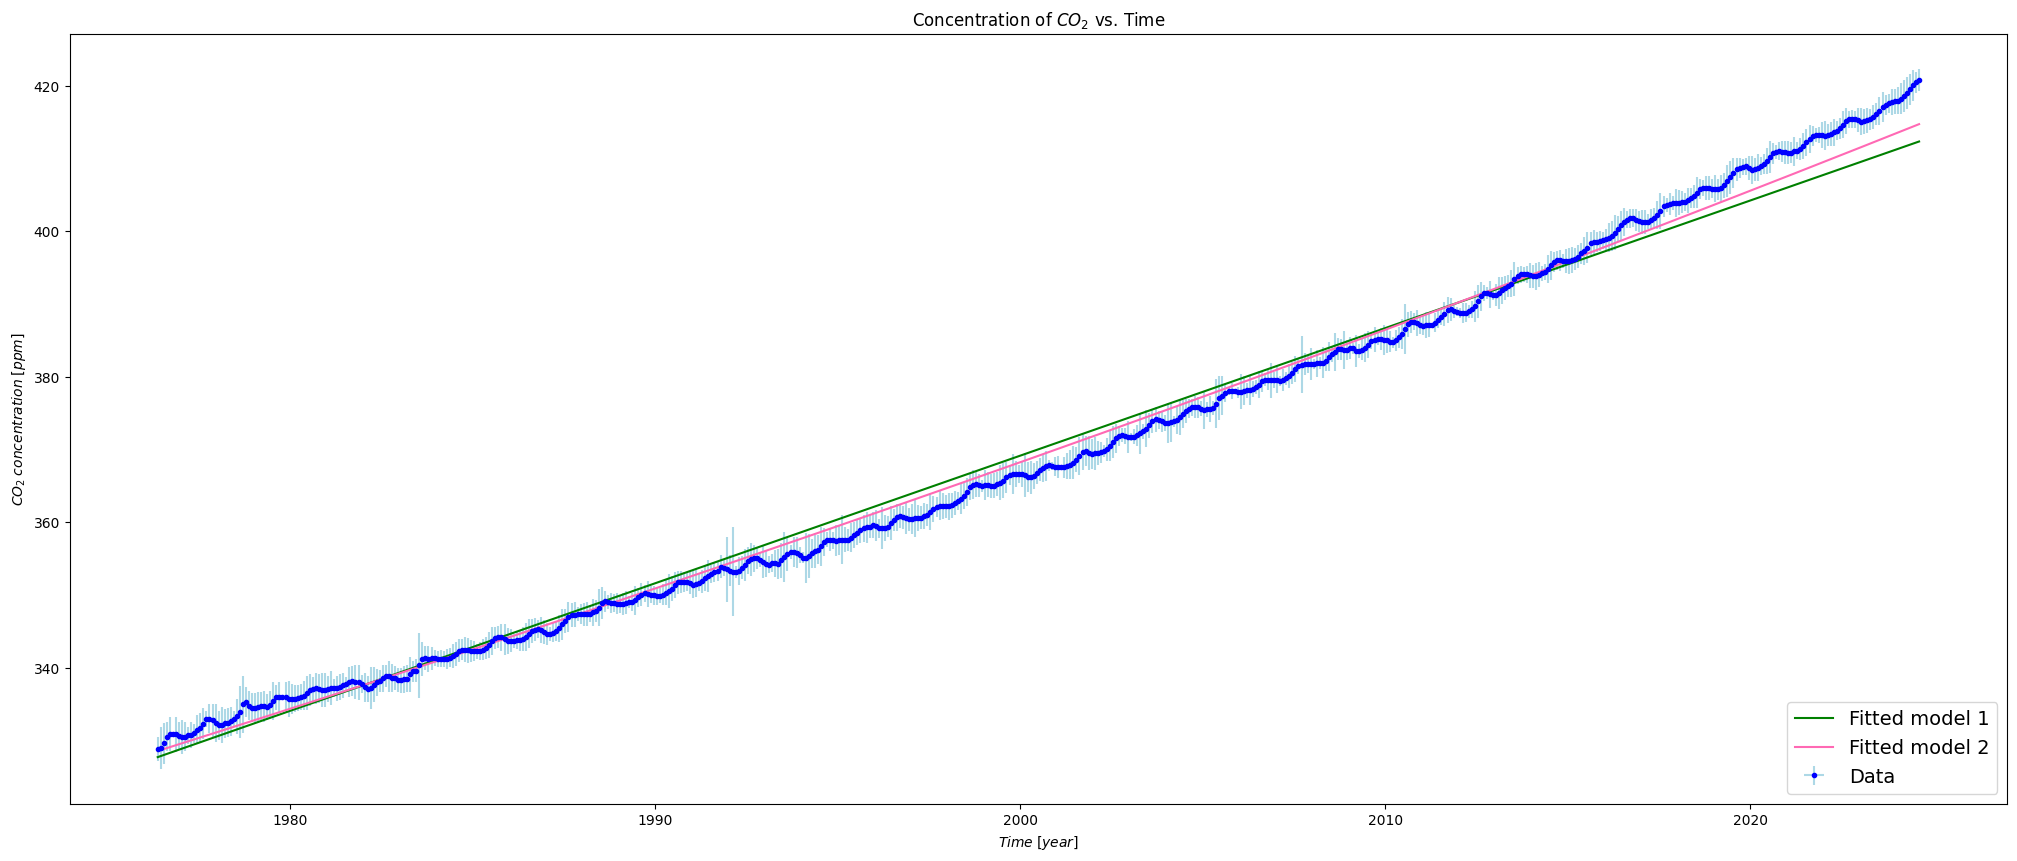

In [17]:
#Plotting

plt.figure(figsize=(25,10))

plt.title(r"Concentration of $CO_2$ vs. Time")
plt.ylabel(r"$CO_2 \; concentration \; [ppm]$")
plt.xlabel(r"$Time \; [year]$")

plt.errorbar(date, co2_conc, std_10, 0, marker = ".", linestyle = " ", ecolor="lightblue", 
             color = "Blue", label = "Data" )
plt.plot(time_arr, co2_fit, color = "green", linestyle = "-", label = "Fitted model 1" )
plt.plot(time_arr, co2_fit2, color = "hotpink", linestyle = "-", label = "Fitted model 2" )

plt.legend(loc = 4, fontsize = 14)

plt.show()

In [18]:
#Call the function to get the statistics for the fitted model 2 

chi2_sqr, chi2_sqr_red, nu2 = chi_sqr_stats(co2_conc, co2_fit2, std_10, coef2_chi)

print(f"Chi square = {chi2_sqr}")
print(f"Chi square reduced = {chi2_sqr_red}")
print(f"Degrees of freedom = {nu}\n")

#Comparison of both chi square reduced statistics

print(f"Chi square reduced of model 1 (linear) = {chi_sqr_red}")
print(f"Chi square reduced of model 2 (t**5) = {chi2_sqr_red}")


Chi square = 1200.3808388454822
Chi square reduced = 2.0767834582101767
Degrees of freedom = 578

Chi square reduced of model 1 (linear) = 4.081646980272801
Chi square reduced of model 2 (t**5) = 2.0767834582101767


It is seen in the chi square reduced statistic that the value for model 2 ($\sim e^{b*time}$) is smaller than model 1 ($\sim t$). This result shows than there is a more accurated fit for model 2 tha for model 1. 


(h) Finally, you will construct **2D confidence intervals** using the $\chi^2$ statistic evaluated in the vicinity of the best-fit values for the free parameters of Models 1 and 2. Since both models have two free parameters, you should create python functions that compute and return the 2D $\chi^2$ surface of each model onto the respective parameter space. Hints: to create a 2D parameter space as a meshgrid, you should first create vectors with numbers around the best-fit values found in your regressions. 1D plots showing $\chi^2$ as a function of each parameter may help identify optimal numbers.

In [19]:
#Function to  get chi square vs free parameters

def chi_sqr_vs_freep1(model, exp_value, time, sigma,  a_array, b_array):
    """
    """
    #Empty arrays to store chi square values
    chi_sqr_a = []
    chi_sqr_b = []

    #For loop to evaluate all a values
    b = b_array[int(len(date)/2)] #Fix b value

    for a in a_array:
        chi_sqr_value = np.sum((model(time, a, b)-exp_value)**2/(sigma)**2)
        chi_sqr_a.append(chi_sqr_value)
    
    #For loop to evaluate all b values
    a = a_array[int(len(date)/2)] #Fix a value

    for b in b_array:
        chi_sqr_value = np.sum((exp_value - model(time, a, b))**2/(sigma)**2)
        chi_sqr_b.append(chi_sqr_value)

    return np.array(chi_sqr_a, dtype = float),  np.array(chi_sqr_b, dtype = float)

In [20]:
#Create a grid for plotting chi square in fuction of a and b for model 1 (+/-10 sigma)

a1_arr = np.linspace(coef_chi[0]-coef_unc[0], coef_chi[0]+coef_unc[0], len(date))
b1_arr = np.linspace(coef_chi[1]-coef_unc[1], coef_chi[1]+coef_unc[1], len(date))

#Create a grid for plotting chi square in fuction of a and b for model 2 (+/-10 sigma)

a2_arr = np.linspace(coef2_chi[0]-coef2_unc[0], coef2_chi[0]+coef2_unc[0], len(date))
b2_arr = np.linspace(coef2_chi[1]-coef2_unc[1], coef2_chi[1]+coef2_unc[1], len(date))

#Call the function

chi_vs_a1, chi_vs_b1 = chi_sqr_vs_freep1(model_1, co2_conc, time_arr, std_10, a1_arr, b1_arr)

chi2_vs_a2, chi2_vs_b2 = chi_sqr_vs_freep1(model_2, co2_conc, time_arr, std_10, a2_arr, b2_arr)

print(chi_vs_a1.shape , chi2_vs_a2.shape) 

(580,) (580,)


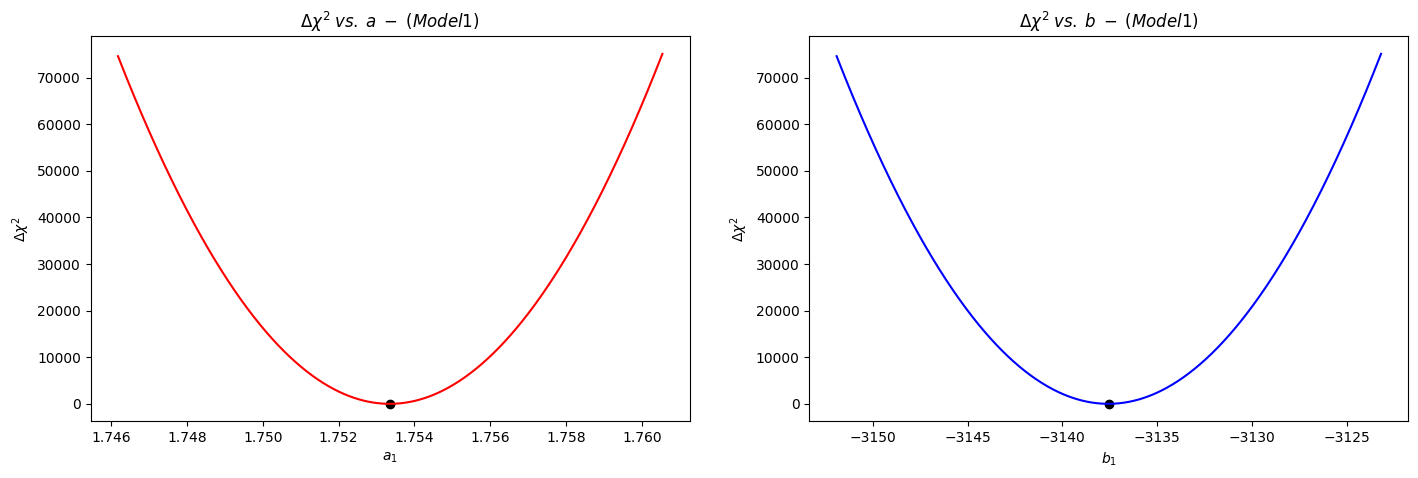

In [21]:
#Plot chi square vs, free parameters of model 1

plt.figure(figsize=(17,5))


plt.subplot(1, 2, 1)
plt.scatter(coef_chi[0], chi_sqr - np.min(chi_vs_a1), marker = "o", color = "black")
plt.plot(a1_arr, chi_vs_a1 - np.min(chi_vs_a1), color = "red", linestyle = "-", label = "" )
plt.title(r"$ \Delta \chi^{2} \; vs. \; a \;- \;(Model 1)$")
plt.xlabel(r"$a_1$")
plt.ylabel(r"$\Delta \chi^{2}$")

plt.subplot(1, 2, 2)
plt.scatter(coef_chi[1], chi_sqr - np.min(chi_vs_b1), marker = "o", color = "black")
plt.plot(b1_arr, chi_vs_b1 -np.min(chi_vs_b1), color = "blue", linestyle = "-", label = "" )
plt.title(r"$\Delta \chi^{2} \; vs. \; b\; - \;(Model 1)$")
plt.xlabel(r"$b_1$")
plt.ylabel(r"$\Delta \chi^{2}$")


plt.show()

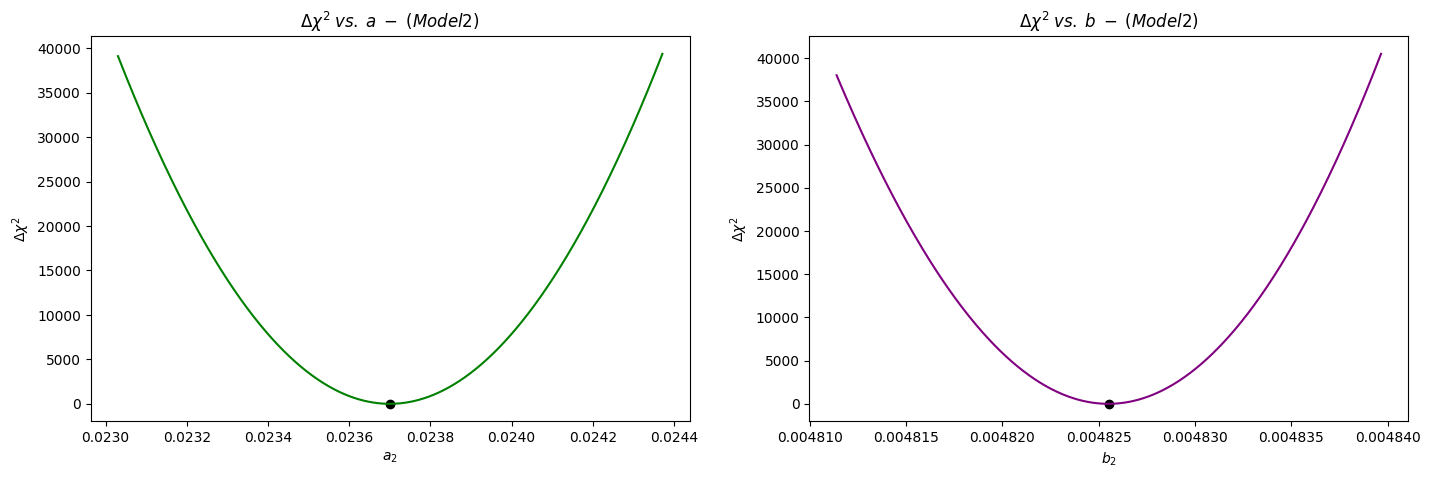

In [22]:
#Plot chi square vs. free parameters of model 2

plt.figure(figsize=(17,5))


plt.subplot(1, 2, 1)
plt.scatter(coef2_chi[0], chi2_sqr - np.min(chi2_vs_a2), marker = "o", color = "black")
plt.plot(a2_arr, chi2_vs_a2 - np.min(chi2_vs_a2), color = "green", linestyle = "-", label = "" )
plt.title(r"$ \Delta \chi^{2} \; vs. \; a \;- \;(Model 2)$")
plt.xlabel(r"$a_2$")
plt.ylabel(r"$\Delta \chi^{2}$")

plt.subplot(1, 2, 2)
plt.scatter(coef2_chi[1], chi2_sqr - np.min(chi2_vs_b2), marker = "o", color = "black")
plt.plot(b2_arr, chi2_vs_b2 - np.min(chi2_vs_b2), color = "purple", linestyle = "-", label = "" )
plt.title(r"$\Delta \chi^{2} \; vs. \; b\; - \;(Model 2)$")
plt.xlabel(r"$b_2$")
plt.ylabel(r"$\Delta \chi^{2}$")


plt.show()

In [23]:


def chi_sqr_2d(model, exp_value, time, sigma,  a_array, b_array):
    """
    Function to  get chi square surface
    Inputs: 
        model: function model to evaluate the chi square statistic
        exp_value: experimental data values (1D array, float)
        sigma: standard deviation from data (1D array, float)
        To evaluate the function model():
            a_array, b_array: free parameters (1D arrays, float)
            time: independent variable (1D array, float)
    Output: 
        chi_sqr_2d: chi square for all posibles combinations of a and b (2D array, float)
    """
    chi_sqr_2d = [] #Empty list to save chi square 
    #Double for loop to compute for all values of a and b
    for b in b_array:
        chi_sqr_row = [] #Empty list to save rows
        for a in a_array:
            chi_sqr = np.sum((model(time, a, b)-exp_value)**2/(sigma)**2)
            chi_sqr_row.append(chi_sqr)
        chi_sqr_2d.append(chi_sqr_row)

    return np.array(chi_sqr_2d)


In [24]:
#Make a meshgrid with the array for free parameters

a1_2d, b1_2d = np.meshgrid(a1_arr, b1_arr)

a2_2d, b2_2d = np.meshgrid(a2_arr, b2_arr)


print(a1_2d.shape, a2_2d.shape)


(580, 580) (580, 580)


In [25]:
#Evaluate chi square values for a and b grids 

chi1_2d = chi_sqr_2d(model_1, co2_conc, time_arr, std_10, a1_arr, b1_arr)
chi2_2d = chi_sqr_2d(model_2, co2_conc, time_arr, std_10, a2_arr, b2_arr)


In [26]:
#Check the shapes 

print(chi1_2d.shape, chi2_2d.shape)

(580, 580) (580, 580)


(i) Make a high-quality, labeled, multi-panel figure showing the 2D $\chi^2$ surface of each model: first in 3D, and then in projection with a marker showing the minimum and overimposed contours indicating at least two confidence levels. Briefly comment on your results highlighting the differences between the confidence intervals of both models. What do these confidence intervals tell us? Hint: the maps should have one of the free parameters in the X axis, the other free parameter in the Y axis, and the $\chi^2$ surface in the Z axis.

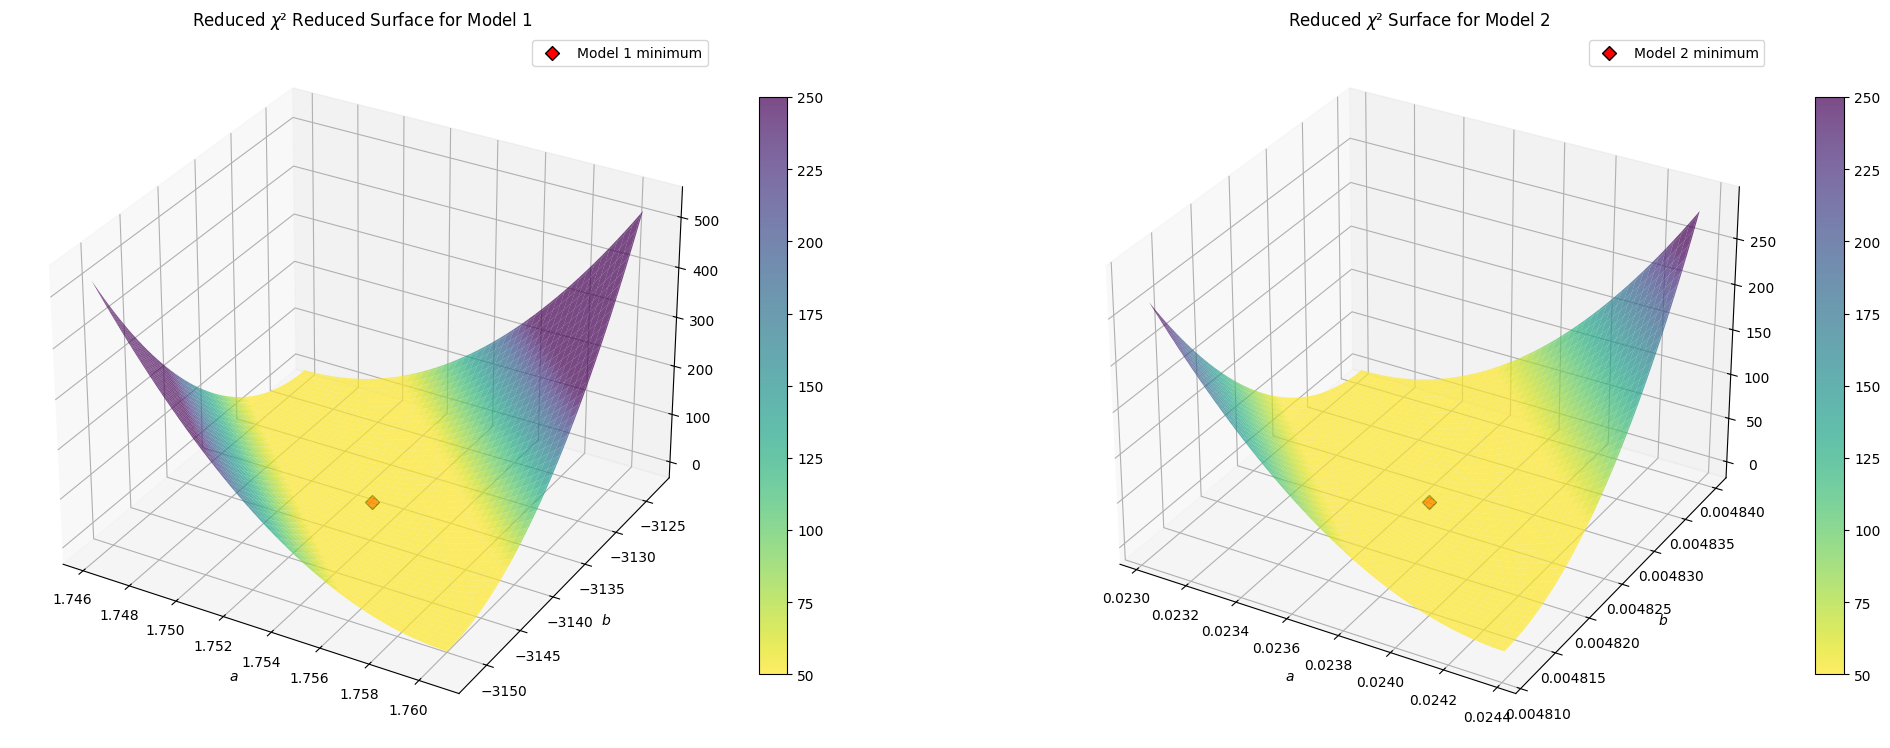

In [27]:
#Plotting the Chi square surface

fig1, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize = (25, 15))

surface1 = ax1.plot_surface(a1_2d, b1_2d, chi1_2d/nu, cmap = "viridis_r", alpha = 0.7,  vmin=50, vmax=250)
ax1.scatter3D(coef_chi[0], coef_chi[1], chi1_2d.min()/nu, color = "red", edgecolor = "black", s=50, marker = "D", label = "Model 1 minimum")
ax1.set_title(r"Reduced $\chi²$ Reduced Surface for Model 1")
ax1.set_xlabel(r"$a$")
ax1.set_ylabel(r"$b$")

fig1.colorbar(surface1, shrink=0.5)

surface2 = ax2.plot_surface(a2_2d, b2_2d, chi2_2d/nu, cmap = "viridis_r", alpha = 0.7, vmin=50, vmax=250)
ax2.scatter3D(coef2_chi[0], coef2_chi[1], chi2_2d.min()/nu, color = "red", edgecolor = "black", s=50, marker = "D", label = "Model 2 minimum")
ax2.set_title(r"Reduced $\chi²$ Surface for Model 2")
ax2.set_xlabel(r"$a$")
ax2.set_ylabel(r"$b$")

fig1.colorbar(surface2, shrink=0.5)


ax1.legend(fontsize = 10)
ax2.legend(fontsize = 10)


plt.show()

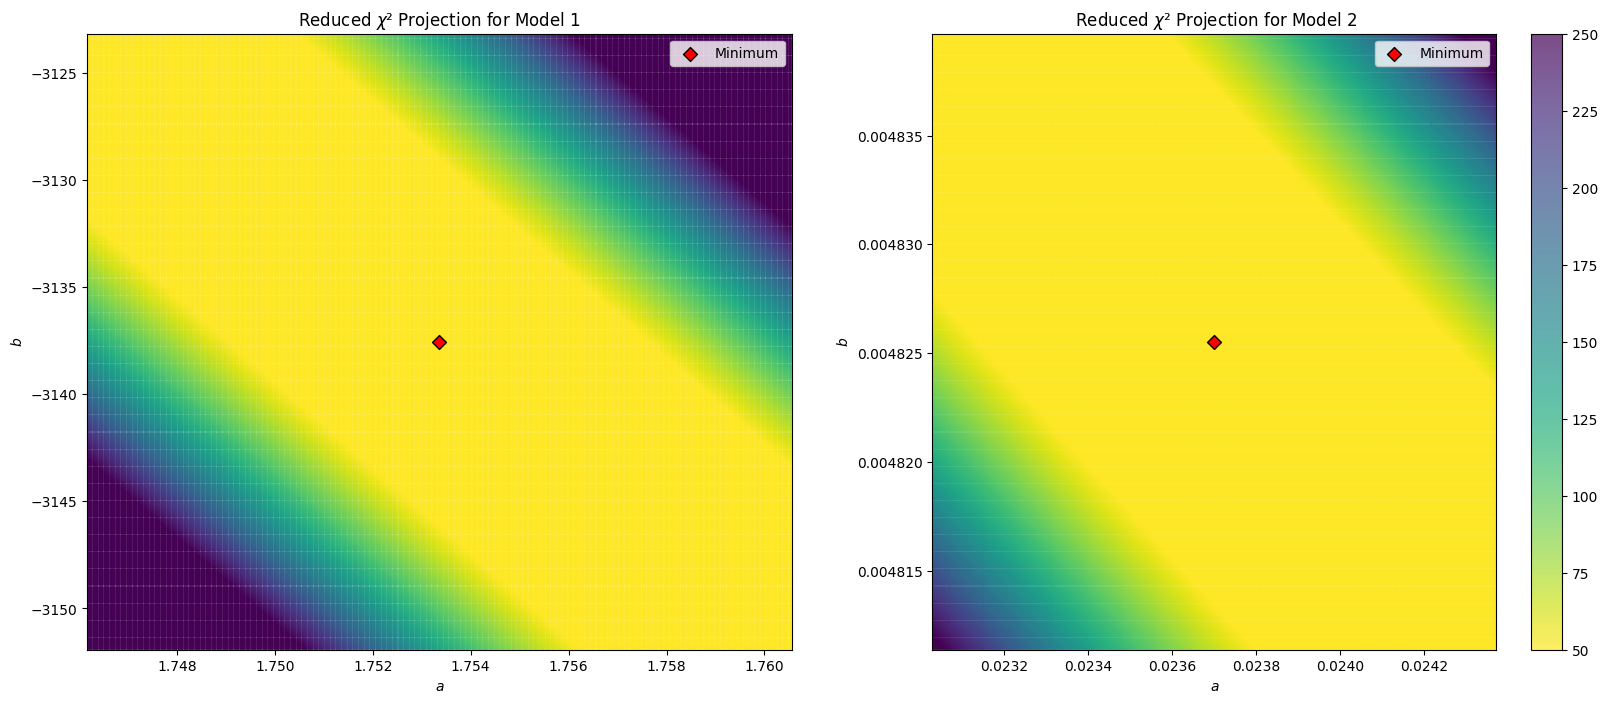

In [28]:
# Plotting the projections


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
ax1, ax2 = ax.flatten()

#Projection for model 1
proj_1 = ax1.pcolor(a1_2d, b1_2d, chi1_2d/nu, cmap = "viridis_r", alpha = 0.7, vmin=50, vmax=250)
ax1.scatter(coef_chi[0], coef_chi[1], color = "red", edgecolor = "black", s=50, marker = "D", label = "Minimum")
ax1.set_title(r"Reduced $\chi²$ Projection for Model 1")
ax1.set_xlabel(r"$a$")
ax1.set_ylabel(r"$b$")

ax1.legend()


#Projection for model 2
proj_2 = ax2.pcolor(a2_2d, b2_2d, chi2_2d/nu, cmap = "viridis_r", alpha = 0.7, vmin=50, vmax=250)
ax2.scatter(coef2_chi[0], coef2_chi[1], color = "red", edgecolor = "black", s=50, marker = "D", label = "Minimum")
ax2.set_title(r" Reduced $\chi²$ Projection for Model 2")
ax2.set_xlabel(r"$a$")
ax2.set_ylabel(r"$b$")

ax2.legend()

#plt.colorbar(proj_1)
plt.colorbar(proj_2)

plt.show()

In [29]:
#Create a function to calculate the conffidence intervals

def conf_intrevals(confidence_lvl, chi_2d, nu):
    """
    Fuction to calculate the confidence intervals
    Inputs: 
        confidence_lvl: confidence levels to consider from 0 to 1 (1D array, float)
        chi_2d: chi square values (2D array, float)
        nu: number of degrees of freedom
    Output:
        interval_conf: confidence intervals whithin reduced chi_2d (1D array, float)
        empty dic: python dictionary to name properly the contours in a plot (str, and float)
    """
    interval_conf = np.quantile(chi_2d, 1 - confidence_lvl)/nu

    empty_dic = {}
    conf_arr = np.array(np.round(confidence_lvl*100., 1), dtype = str)
    for i in range(len(confidence_lvl)):
        empty_dic[interval_conf[i]] = conf_arr[i] + "%"

    return interval_conf, empty_dic

In [30]:
#Define confidence levels 

c0 = 0.90
c1 = 0.80
#c2 = 0.5
c3 = 0.2

confidence_levels = np.array([c0, c1, c3])

#Call the function to get values for cofidence intervals

interval_conf1, contour_label1  = conf_intrevals(confidence_levels, chi1_2d, nu)
interval_conf2, contour_label2  = conf_intrevals(confidence_levels, chi2_2d, nu)

#print(np.array(interval_conf1, dtype = str))

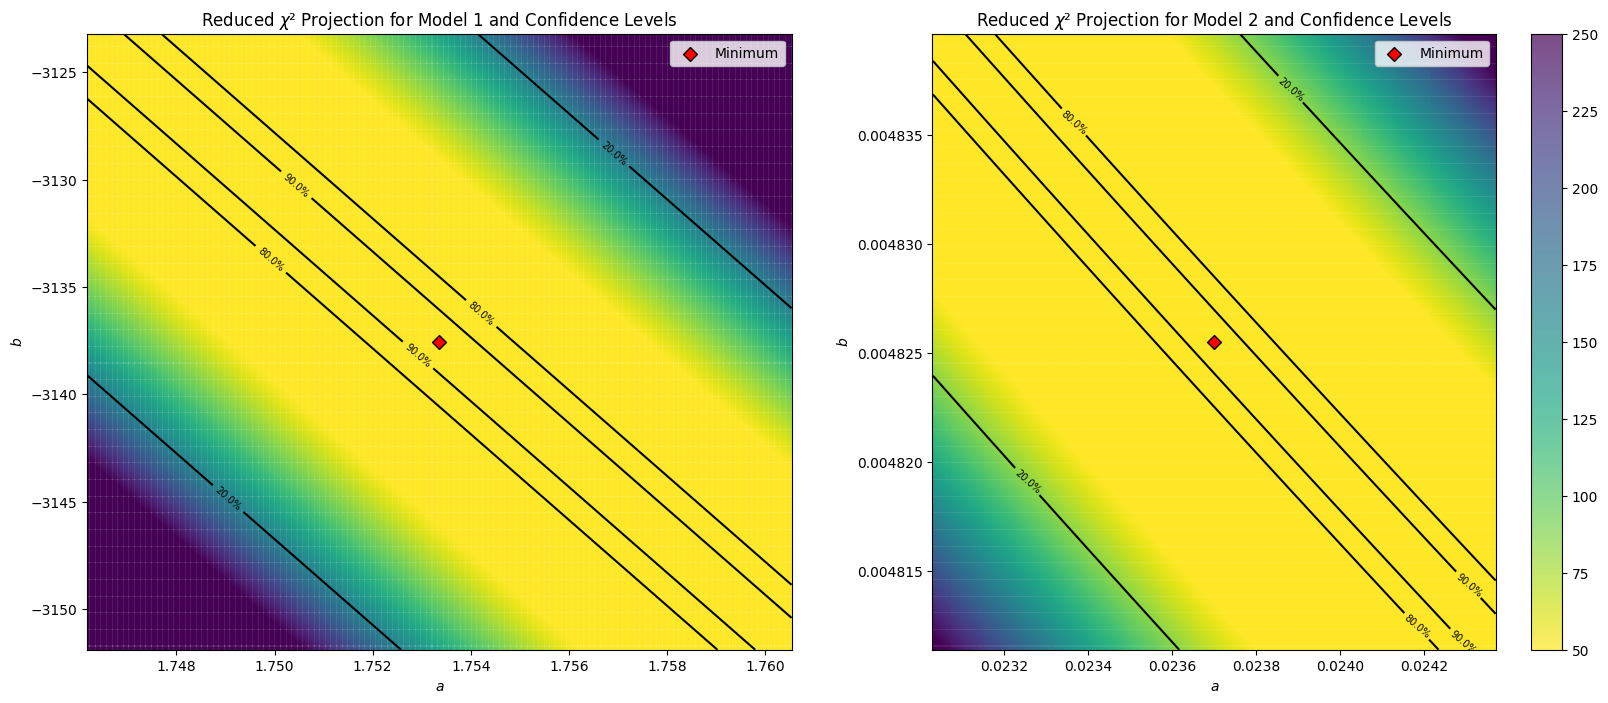

In [31]:
# Plotting the projections


fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
ax1, ax2 = ax.flatten()

# #Projection for model 1
proj_2 = ax1.pcolor(a1_2d, b1_2d, chi1_2d/nu, cmap = "viridis_r", alpha = 0.7, vmin=50, vmax=250)
cont1 = ax1.contour(a1_2d, b1_2d, chi1_2d/nu, levels = interval_conf1, colors = ["black"])
ax1.clabel(cont1, inline=True, fontsize=7, fmt = contour_label1 )
ax1.scatter(coef_chi[0], coef_chi[1], color = "red", edgecolor = "black", s=50, marker = "D", label = "Minimum")
ax1.set_title(r"Reduced $\chi²$ Projection for Model 1 and Confidence Levels")
ax1.set_xlabel(r"$a$")
ax1.set_ylabel(r"$b$")

ax1.legend()


#Projection for model 2
proj_2 = ax2.pcolor(a2_2d, b2_2d, chi2_2d/nu, cmap = "viridis_r", alpha = 0.7, vmin=50, vmax=250)
cont2 = ax2.contour(a2_2d, b2_2d, chi2_2d/nu, levels = interval_conf2, colors = "black")
ax1.clabel(cont2, inline=True, fontsize=7, fmt = contour_label2 )
ax2.scatter(coef2_chi[0], coef2_chi[1], color = "red", edgecolor = "black", s=50, marker = "D", label = "Minimum")
ax2.set_title(r"Reduced $\chi²$ Projection for Model 2 and Confidence Levels")
ax2.set_xlabel(r"$a$")
ax2.set_ylabel(r"$b$")

ax2.legend()

#plt.colorbar(proj_1)
plt.colorbar(proj_2)

plt.show()

It is observed that the confidence levels of Model 2 (exponential) are closer to the optimal reduced $\chi²$ value than those of Model 1 (linear). This is clearly evident at the 20% confidence level. This indicates that Model 2 provides a btter fit to data than Model 1, since the $\chi²$ statistics are lower. It is also important to note that, since the intervals for Model 2 are narrower, it is more precise.

## Problem 2. (5 points) Interpolation: Greenhouse Gases

In this problem, you will calculate and compare the amount of heating produced by three greenhouse gases:

- $\rm CO_2$, which you already analysed in the previous problem.

- $\rm CH_4$, whose data you can find here:
  https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_CH4_data_download.csv

- $\rm N_2O$, whose data you can find here:
  https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_N2O_data_download.csv

All the data were taken by the same monitoring station in Australia. The new files for $\rm CH_4$ and $\rm N_2O$ have the same structure as the file for $\rm CO_2$, but the concentrations and standard deviations are in units of $\rm ppb$.

### Tasks:

(a) Repeat steps (a), (b) and (c) of problem 1 for $\rm CH_4$ and $\rm N_2O$. Which of the 3 greenhouse gases has higher and lower concentrations in the atmosphere? How many $\rm dex$ apart are their concentrations? 

(b) Now, you will compute the amount of heat (energy) trapped by the greenhouse gases in the atmosphere by computing the so-called **radiative forcing** ($\Delta F$), which refers to the change in energy balance in the atmosphere due to greenhouse gas concentrations. For each gas the semi-empirical functions read:

- For $\rm CO_2$: $\Delta F_{\text{CO}_2} = \alpha \cdot \ln\left(\frac{C}{C_0}\right)$, where: $\Delta F_{\text{CO}_2}$ is the radiative forcing due to carbon dioxide ($\rm W/m^2$), $\alpha = 5.35 \, \rm W/m^2$, $C$ is the ctime-dependent concentration of $\text{CO}_2 $ in $\rm ppm$, and $C_0$ is the pre-industrial concentration of $\text{CO}_2$ in $\rm ppm$ (typically $=280$).

- For $\text{CH}_4$: $\Delta F_{\text{CH}_4} = \beta \cdot \left(\sqrt{M} - \sqrt{M_0}\right)$, where: $\Delta F_{\text{CH}_4}$ is the radiative forcing due to methane ($\rm W/m^2$), $\beta = 0.036 \, \rm W/m^2 $, $M$ is the time-dependent concentration of $\rm CH_4$ in ppb, and $M_0$ is the pre-industrial concentration of $\text{CH}_4$ in $\rm ppb$ (typically $=700$).

- For $\rm N_2O$: $\Delta F_{\text{N}_2\text{O}} = \gamma \cdot \left(\sqrt{N} - \sqrt{N_0}\right)$, where: $\Delta F_{\text{N}_2\text{O}} $ is the radiative forcing due to nitrous oxide ($\rm W/m^2$), $\gamma = 0.12 \, \rm W/m^2$, $N$ is the time-dependent concentration of $\rm N_2O$ in ppb, $N_0$ is the pre-industrial concentration of $\text{N}_2\text{O}$ in $\rm ppb$ (typically $=270$).

The full expressions can be found in this paper (see table 1): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL071930

(c) Make a single high-quality, labeled plot showing the **radiative forcings** ($\Delta F$) of all three greenhouse gases in units of $\rm W/m^2 $ (including the y-error bars) versus time. How many $\rm dex$ apart are their contributions? Compare with your dex analysis in point (a) and discuss which gas has a higher warming potential.

(d) Now, you need to calculate a **total radiative forcing** ($\Delta F_{\rm total}$) by adding all contributions, but you will notice the data sampling and time arrays do not match. Therefore, before you add the contributions, you will first need to interpolate the individual gas data onto a unified time domain. To achieve this, you should generate a new time array with a 1-year spacing. Then, use **scipy** to interpolate the **radiative forcings** ($\Delta F$) of each gas onto the new time array. Report the interpolation results in a single figure showing the original data and the interpolated data.

(e) Finally, use the interpolated data to calculate the **total radiative forcing** ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$). Report the result in a high-quality, labeled plot of $\Delta F_{\rm global}$ (in $\rm W/m^2$) versus time in years.

## Problem 2. (5 points) Interpolation: Greenhouse Gases

In this problem, you will calculate and compare the amount of heating produced by three greenhouse gases:

- $\rm CO_2$, which you already analysed in the previous problem.

- $\rm CH_4$, whose data you can find here:
  https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_CH4_data_download.csv

- $\rm N_2O$, whose data you can find here:
  https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/CapeGrim_N2O_data_download.csv

All the data were taken by the same monitoring station in Australia. The new files for $\rm CH_4$ and $\rm N_2O$ have the same structure as the file for $\rm CO_2$, but the concentrations and standard deviations are in units of $\rm ppb$.

### Tasks:

(a) Repeat steps (a), (b) and (c) of problem 1 for $\rm CH_4$ and $\rm N_2O$. Which of the 3 greenhouse gases has higher and lower concentrations in the atmosphere? How many $\rm dex$ apart are their concentrations? 

(b) Now, you will compute the amount of heat (energy) trapped by the greenhouse gases in the atmosphere by computing the so-called **radiative forcing** ($\Delta F$), which refers to the change in energy balance in the atmosphere due to greenhouse gas concentrations. For each gas the semi-empirical functions read:

- For $\rm CO_2$: $\Delta F_{\text{CO}_2} = \alpha \cdot \ln\left(\frac{C}{C_0}\right)$, where: $\Delta F_{\text{CO}_2}$ is the radiative forcing due to carbon dioxide ($\rm W/m^2$), $\alpha = 5.35 \, \rm W/m^2$, $C$ is the ctime-dependent concentration of $\text{CO}_2 $ in $\rm ppm$, and $C_0$ is the pre-industrial concentration of $\text{CO}_2$ in $\rm ppm$ (typically $=280$).

- For $\text{CH}_4$: $\Delta F_{\text{CH}_4} = \beta \cdot \left(\sqrt{M} - \sqrt{M_0}\right)$, where: $\Delta F_{\text{CH}_4}$ is the radiative forcing due to methane ($\rm W/m^2$), $\beta = 0.036 \, \rm W/m^2 $, $M$ is the time-dependent concentration of $\rm CH_4$ in ppb, and $M_0$ is the pre-industrial concentration of $\text{CH}_4$ in $\rm ppb$ (typically $=700$).

- For $\rm N_2O$: $\Delta F_{\text{N}_2\text{O}} = \gamma \cdot \left(\sqrt{N} - \sqrt{N_0}\right)$, where: $\Delta F_{\text{N}_2\text{O}} $ is the radiative forcing due to nitrous oxide ($\rm W/m^2$), $\gamma = 0.12 \, \rm W/m^2$, $N$ is the time-dependent concentration of $\rm N_2O$ in ppb, $N_0$ is the pre-industrial concentration of $\text{N}_2\text{O}$ in $\rm ppb$ (typically $=270$).

The full expressions can be found in this paper (see table 1): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL071930

(c) Make a single high-quality, labeled plot showing the **radiative forcings** ($\Delta F$) of all three greenhouse gases in units of $\rm W/m^2 $ (including the y-error bars) versus time. How many $\rm dex$ apart are their contributions? Compare with your dex analysis in point (a) and discuss which gas has a higher warming potential.

(d) Now, you need to calculate a **total radiative forcing** ($\Delta F_{\rm total}$) by adding all contributions, but you will notice the data sampling and time arrays do not match. Therefore, before you add the contributions, you will first need to interpolate the individual gas data onto a unified time domain. To achieve this, you should generate a new time array with a 1-year spacing. Then, use **scipy** to interpolate the **radiative forcings** ($\Delta F$) of each gas onto the new time array. Report the interpolation results in a single figure showing the original data and the interpolated data.

(e) Finally, use the interpolated data to calculate the **total radiative forcing** ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$). Report the result in a high-quality, labeled plot of $\Delta F_{\rm global}$ (in $\rm W/m^2$) versus time in years.

## Solution

(a) Repeat steps (a), (b) and (c) of problem 1 for $\rm CH_4$ and $\rm N_2O$. Which of the 3 greenhouse gases has higher and lower concentrations in the atmosphere? How many $\rm dex$ apart are their concentrations? 

In [32]:
def read_data_p2(path):

  """
  Function to extract two columns of a data file (.csv)
  Input: 
    path: directory of the file to read the data 
  Outputs: 
    DATE column: Time information from the data file (1D array, float)
    Concentration column: Concetration information from the data file (1D array, float)
    SD column: Standard deviation from the data file (1D array, float)
  Author: Alan Palma
  """
    
  data_frame = pd.read_csv(path, sep = ",") #Read de file from the path.
  data_frame = data_frame.loc[24:,:] #Avoid the first lines that we do not need.

  new_data_frame = pd.DataFrame({"DATE": np.array(data_frame["Unnamed: 3"], dtype = float), #Covert the three first colums as a new pandas data frame
                    "Concentration(ppb)": np.array(data_frame["Unnamed: 4"], dtype = float),
                    "SD(ppb)": np.array(data_frame["Unnamed: 5"], dtype = float)})
  
  return np.array(new_data_frame["DATE"]), np.array(new_data_frame["Concentration(ppb)"]), np.array(new_data_frame["SD(ppb)"])

In [33]:
#Define the paths

path_ch4 = "CapeGrim_CH4_data_download.csv"
path_n2o = "CapeGrim_N2O_data_download.csv"

#Call the function to read csv

ch4_time, ch4_con, ch4_sd = read_data_p2(path_ch4)
n2o_time, n2o_con, n2o_sd = read_data_p2(path_n2o)

#print(no2_con.shape, ch4_con.shape)

In [34]:
#Rescale the standard desviations

ch4_10sd = 10 * ch4_sd
n2o_10sd = 10* n2o_sd

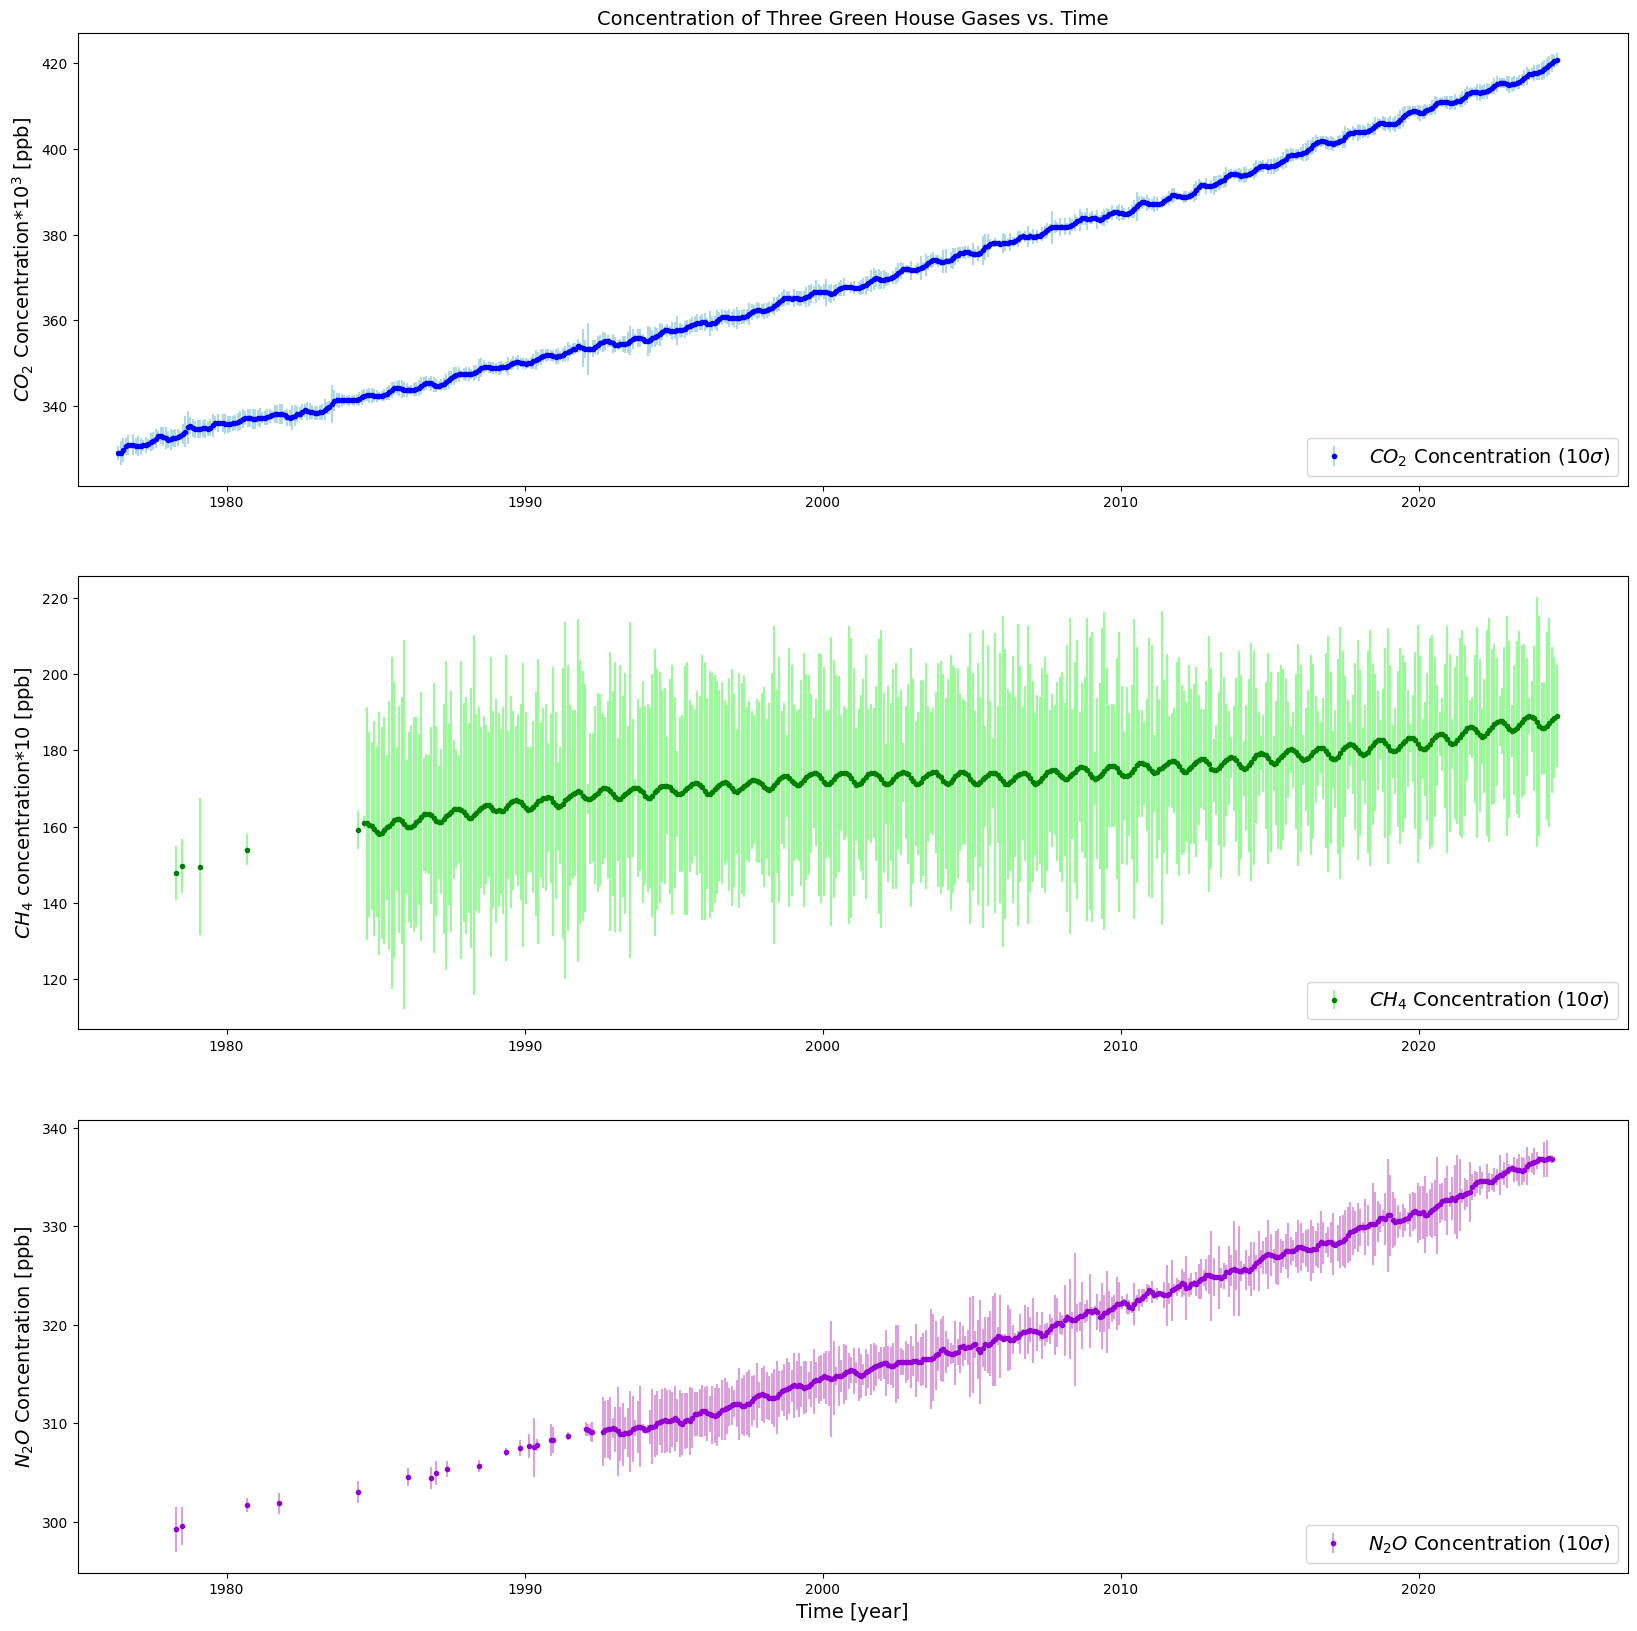

In [35]:
#Plotting all 

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (20,20))
ax1, ax2, ax3 = ax.flatten()

ax1.set_title(r"Concentration of Three Green House Gases vs. Time", fontsize = 14)
ax1.set_ylabel(r"$CO_2$ Concentration*$10^{3}$ [ppb]", fontsize = 14)
# ax1.set_xlabel(r"$Time \; [year]$")
ax1.errorbar(date, co2_conc, std_10, marker = ".", linestyle = " ", ecolor="lightblue", 
             color = "Blue", label = r"$CO_2$ Concentration ($10\sigma$)" )

ax1.set_xlim(1975, 2027)
ax1.legend(loc = 4, fontsize = 14)


# ax2.set_title(r"Concentration of $CH_4$ vs. Time", fontsize = 14)
ax2.set_ylabel(r"$CH_4$ concentration*$10$ [ppb]", fontsize = 14)
# ax2.set_xlabel(r"Time [year]", fontsize = 14)
ax2.errorbar(ch4_time, ch4_con/10, ch4_10sd, marker = ".", linestyle = " ", ecolor="palegreen", 
             color = "green", label = r"$CH_4$ Concentration ($10\sigma$)" )

ax2.set_xlim(1975, 2027)
ax2.legend(loc = 4, fontsize = 14)

# ax3.set_title(r"Concentration of $N_2O$ vs. Time", fontsize = 14)
ax3.set_ylabel(r"$N_2O$ Concentration [ppb]", fontsize = 14)
ax3.set_xlabel(r"Time [year]", fontsize = 14)
ax3.errorbar(n2o_time, n2o_con, n2o_10sd, marker = ".", linestyle = " ", ecolor="plum", 
             color = "darkviolet", label = r"$N_2O$ Concentration ($10\sigma$)")

ax3.set_xlim(1975, 2027)
ax3.legend(loc = 4, fontsize = 14)



plt.show()

$CO_2​$ is the gas with the highest concentration in the atmosphere, while $N_2O$ has the lowest concentration. These two are separated by approximately $10^3$ orders of magnitude (3 dex apart).


(b) Now, you will compute the amount of heat (energy) trapped by the greenhouse gases in the atmosphere by computing the so-called **radiative forcing** ($\Delta F$), which refers to the change in energy balance in the atmosphere due to greenhouse gas concentrations. For each gas the semi-empirical functions read:

- For $\rm CO_2$: $\Delta F_{\text{CO}_2} = \alpha \cdot \ln\left(\frac{C}{C_0}\right)$, where: $\Delta F_{\text{CO}_2}$ is the radiative forcing due to carbon dioxide ($\rm W/m^2$), $\alpha = 5.35 \, \rm W/m^2$, $C$ is the ctime-dependent concentration of $\text{CO}_2 $ in $\rm ppm$, and $C_0$ is the pre-industrial concentration of $\text{CO}_2$ in $\rm ppm$ (typically $=280$).

- For $\text{CH}_4$: $\Delta F_{\text{CH}_4} = \beta \cdot \left(\sqrt{M} - \sqrt{M_0}\right)$, where: $\Delta F_{\text{CH}_4}$ is the radiative forcing due to methane ($\rm W/m^2$), $\beta = 0.036 \, \rm W/m^2 $, $M$ is the time-dependent concentration of $\rm CH_4$ in ppb, and $M_0$ is the pre-industrial concentration of $\text{CH}_4$ in $\rm ppb$ (typically $=700$).

- For $\rm N_2O$: $\Delta F_{\text{N}_2\text{O}} = \gamma \cdot \left(\sqrt{N} - \sqrt{N_0}\right)$, where: $\Delta F_{\text{N}_2\text{O}} $ is the radiative forcing due to nitrous oxide ($\rm W/m^2$), $\gamma = 0.12 \, \rm W/m^2$, $N$ is the time-dependent concentration of $\rm N_2O$ in ppb, $N_0$ is the pre-industrial concentration of $\text{N}_2\text{O}$ in $\rm ppb$ (typically $=270$).

The full expressions can be found in this paper (see table 1): https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2016GL071930



In [36]:
#Define the constants

alpha = 5.35 #For CO2
beta = 0.036 #For CH4
gamma = 0.12 #For N2O

c0 = 280.
m0 = 700.
n0 = 270.

#Calculate the radiative forcing

deltaf_co2 = alpha * np.log(co2_conc/c0)
deltaf_ch4 = beta * (np.sqrt(ch4_con)-np.sqrt(m0))
deltaf_n2o = gamma * (np.sqrt(n2o_con)-np.sqrt(n0))

#print(deltaf_ch4.shape)

(c) Make a single high-quality, labeled plot showing the **radiative forcings** ($\Delta F$) of all three greenhouse gases in units of $\rm W/m^2 $ (including the y-error bars) versus time. How many $\rm dex$ apart are their contributions? Compare with your dex analysis in point (a) and discuss which gas has a higher warming potential.


#### Propagation of errors 

For $\Delta F_{CO_2}$: 

$$
\sigma_{\Delta_{F_{CO_2}}} = |\frac{\alpha}{C}\sigma_c | 
$$

For $\Delta F_{CH_4}$, and $\Delta F_{N_2O}$: 

$$
\sigma_{\Delta F} = \frac{\beta}{2\sqrt{M}}\sigma_M
$$

In [37]:
#Get the uncertainties by propagation of errors

std_deltaf_co2 = np.abs((alpha*std_10)/co2_conc)

std_deltaf_ch4 = (beta*ch4_10sd)/(2*np.sqrt(ch4_con))

std_deltaf_n2o = (gamma*n2o_10sd)/(2*np.sqrt(n2o_con))

#print(std_deltaf_co2.shape)


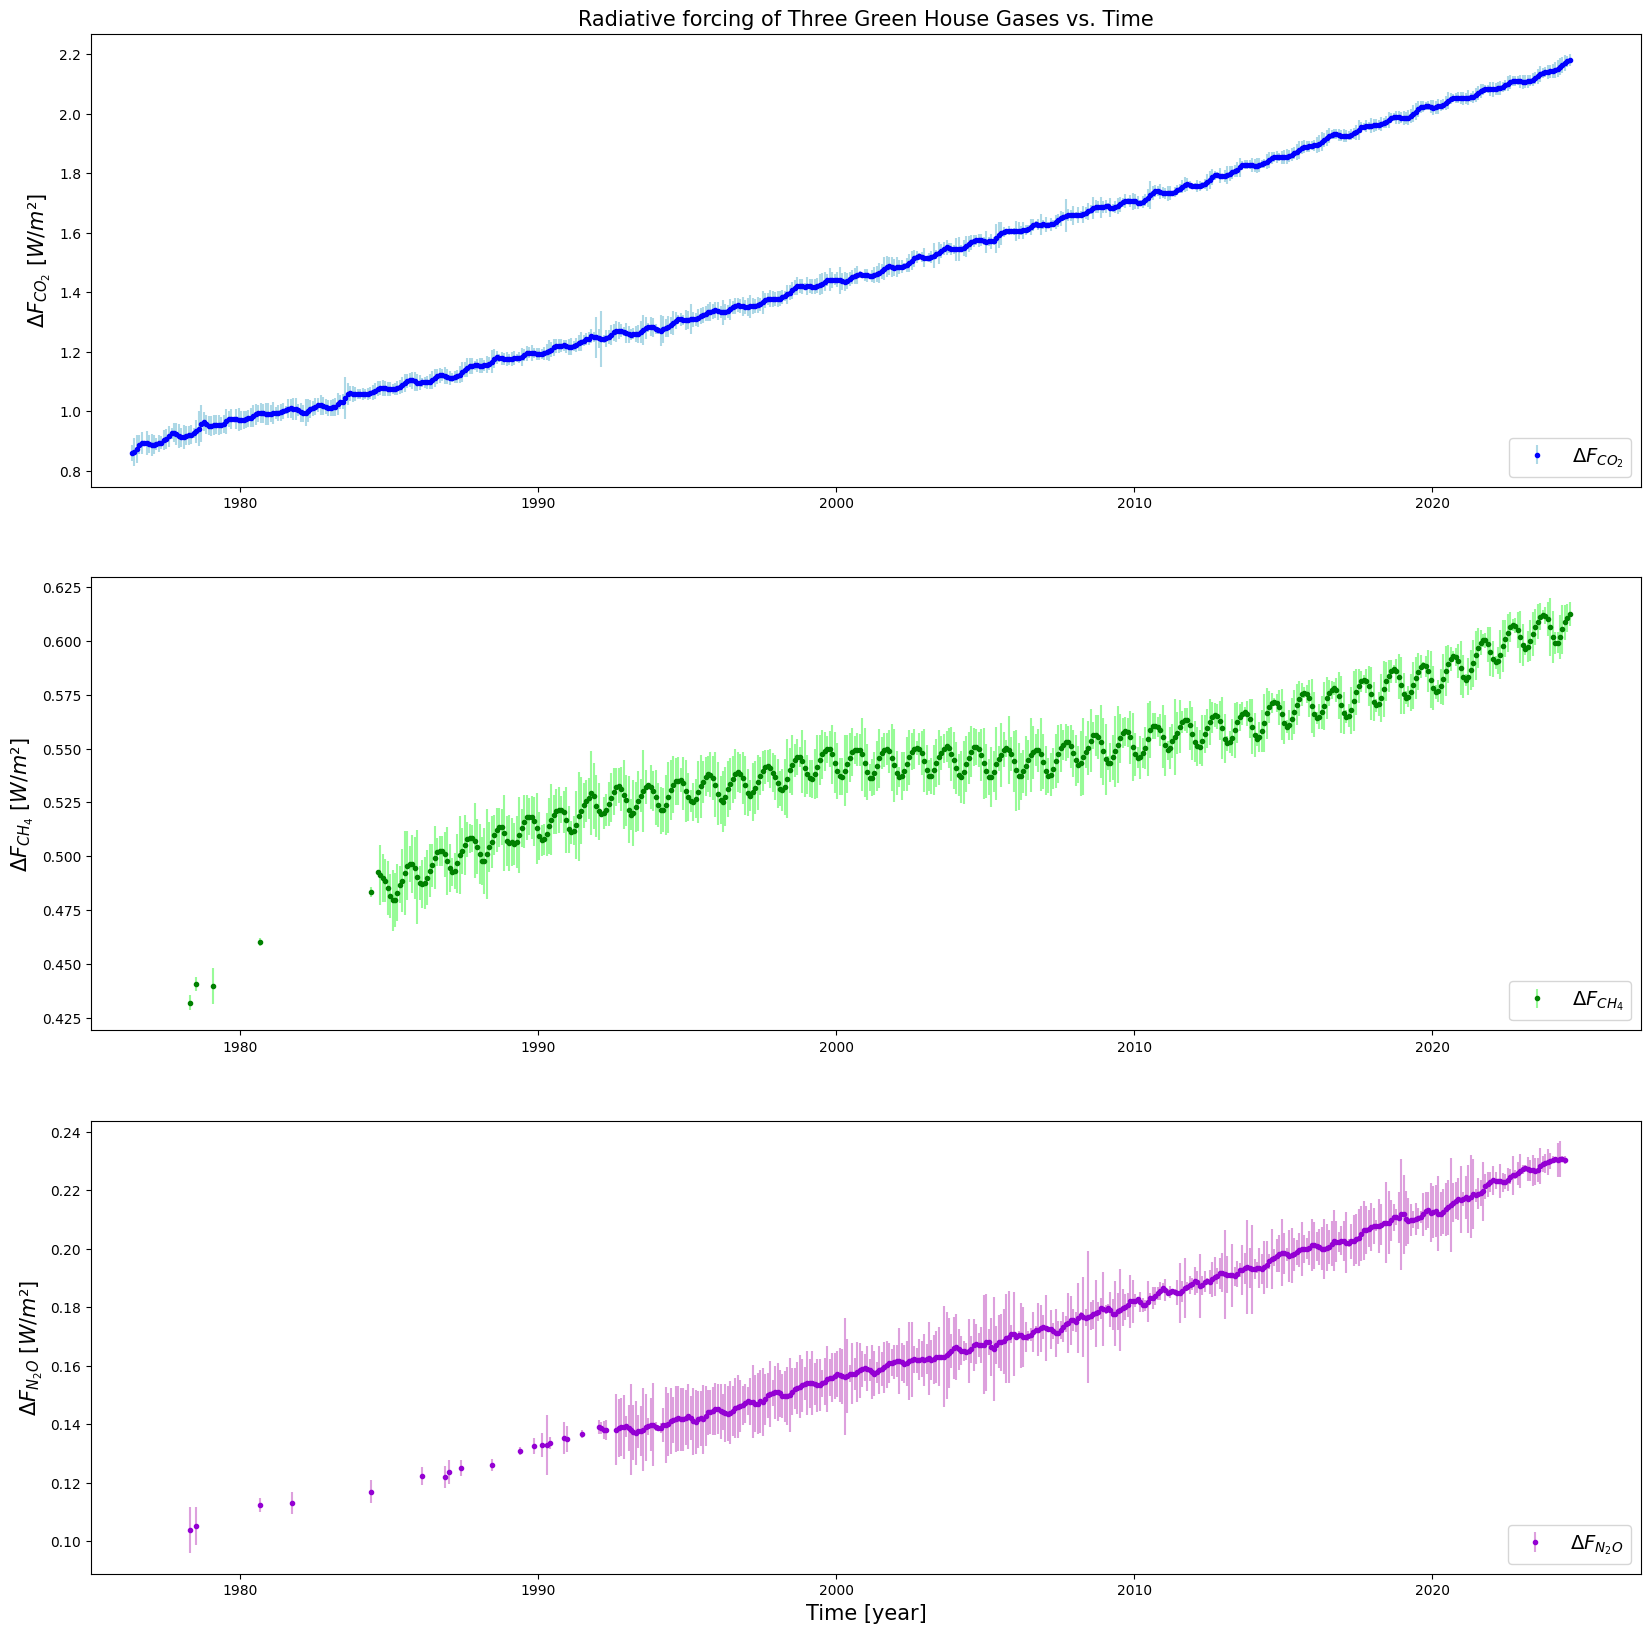

In [38]:
#Plotting radiative forcing due to CO2

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (20,20))
ax1, ax2, ax3 = ax.flatten()

ax1.set_title(r"Radiative forcing of Three Green House Gases vs. Time", fontsize = 15)
ax1.set_ylabel(r"$\Delta F_{CO_2}$ [$W/m²$]", fontsize = 15)
# ax1.set_xlabel(r"$Time \; [year]$", fontsize = 15)
ax1.errorbar(date, deltaf_co2, std_deltaf_co2, marker = ".", linestyle = " ", ecolor="lightblue", 
             color = "blue", label = r"$\Delta F_{CO_2}$" )

ax1.set_xlim(1975, 2027)
ax1.legend(loc = 4, fontsize = 14)


# ax2.set_title(r"Radiative forcing due to $CH_4$", fontsize = 15)
ax2.set_ylabel(r"$\Delta F_{CH_4}$ [$W/m²$]", fontsize = 15)
# ax2.set_xlabel(r"$Time [year]$", fontsize = 15)
ax2.errorbar(ch4_time, deltaf_ch4, std_deltaf_ch4, marker = ".", linestyle = " ", ecolor="palegreen", 
             color = "green", label = r"$\Delta F_{CH_4}$" )

ax2.set_xlim(1975, 2027)
ax2.legend(loc = 4, fontsize = 14)

# ax3.set_title(r"Radiative forcing due to $N_2O$", fontsize = 15)
ax3.set_ylabel(r"$\Delta F_{N_2O}$ [$W/m²$]", fontsize = 15)
ax3.set_xlabel(r"Time [year]", fontsize = 15)
ax3.errorbar(n2o_time, deltaf_n2o, std_deltaf_n2o, marker = ".", linestyle = " ", ecolor="plum", 
             color = "darkviolet" , label = r"$\Delta F_{N_2O}$")

ax3.set_xlim(1975, 2027)
ax3.legend(loc = 4, fontsize = 14)

plt.show()

The order of magnitude corresponding to the radiative forcing of $CO_2 is separated by 1 order with respect to the radiative forcing of $N_2O$ and $CH_4$ (1 $dex$ apart). In comparison to concentration (3 $dex$ apart), this suggests that while $CO_2$ has a higher concentration in the atmosphere, its effect on global warming is smaller compared to the other two gases.


(d) Now, you need to calculate a **total radiative forcing** ($\Delta F_{\rm total}$) by adding all contributions, but you will notice the data sampling and time arrays do not match. Therefore, before you add the contributions, you will first need to interpolate the individual gas data onto a unified time domain. To achieve this, you should generate a new time array with a 1-year spacing. Then, use **scipy** to interpolate the **radiative forcings** ($\Delta F$) of each gas onto the new time array. Report the interpolation results in a single figure showing the original data and the interpolated data.

In [39]:
#Select the year range whithin all time ranges

min_last = np.min([date[-1], ch4_time[-1], n2o_time[-1]]) #Define the final of the new array

min_beggining = np.max([date[0], ch4_time[0], n2o_time[0]]) + 1 #Define the beggining of the new array

time_int = np.arange(int(min_beggining), int(min_last) , 1)

#print(min_last, min_beggining, time_int[0], time_int[-1])

In [40]:
import scipy.interpolate as interp

In [41]:
#Interpolate each data sample

deltaf_co2_inter = interp.interp1d(date, deltaf_co2, "linear")
deltaf_ch4_inter = interp.interp1d(ch4_time, deltaf_ch4, "linear")
deltaf_n2o_inter = interp.interp1d(n2o_time, deltaf_n2o, "linear")


#Evaluate in the new array

deltaf_co2_new = deltaf_co2_inter(time_int)
deltaf_ch4_new = deltaf_ch4_inter(time_int)
deltaf_n2o_new = deltaf_n2o_inter(time_int)



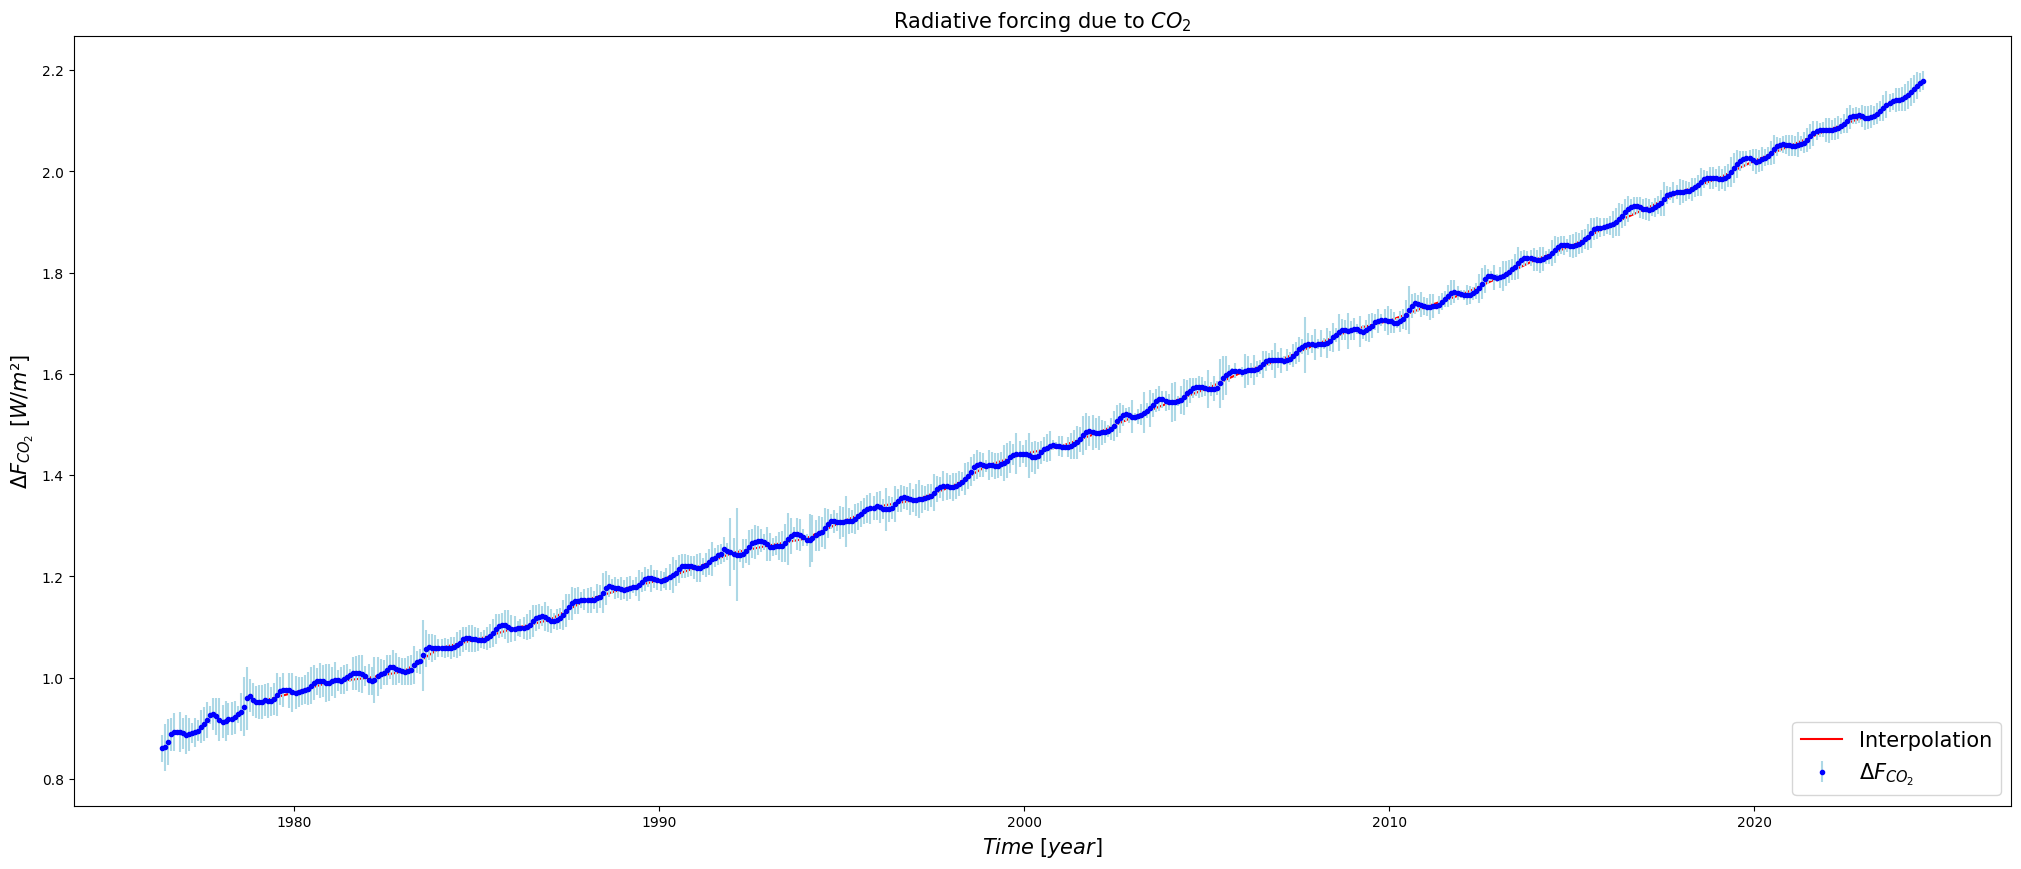

In [42]:
#Plotting radiative forcing due to CO2

plt.figure(figsize=(25,10))

plt.title(r"Radiative forcing due to $CO_2$", fontsize = 15)
plt.ylabel(r"$\Delta F_{CO_2}$ [$W/m²$]", fontsize = 15)
plt.xlabel(r"$Time \; [year]$", fontsize = 15)

plt.plot(time_int, deltaf_co2_new, color = "red", linestyle = "-", label = "Interpolation")
plt.errorbar(date, deltaf_co2, std_deltaf_co2, marker = ".", linestyle = " ", ecolor="lightblue", 
             color = "blue", label = r"$\Delta F_{CO_2}$")


plt.legend(loc = 4, fontsize = 15)

plt.show()

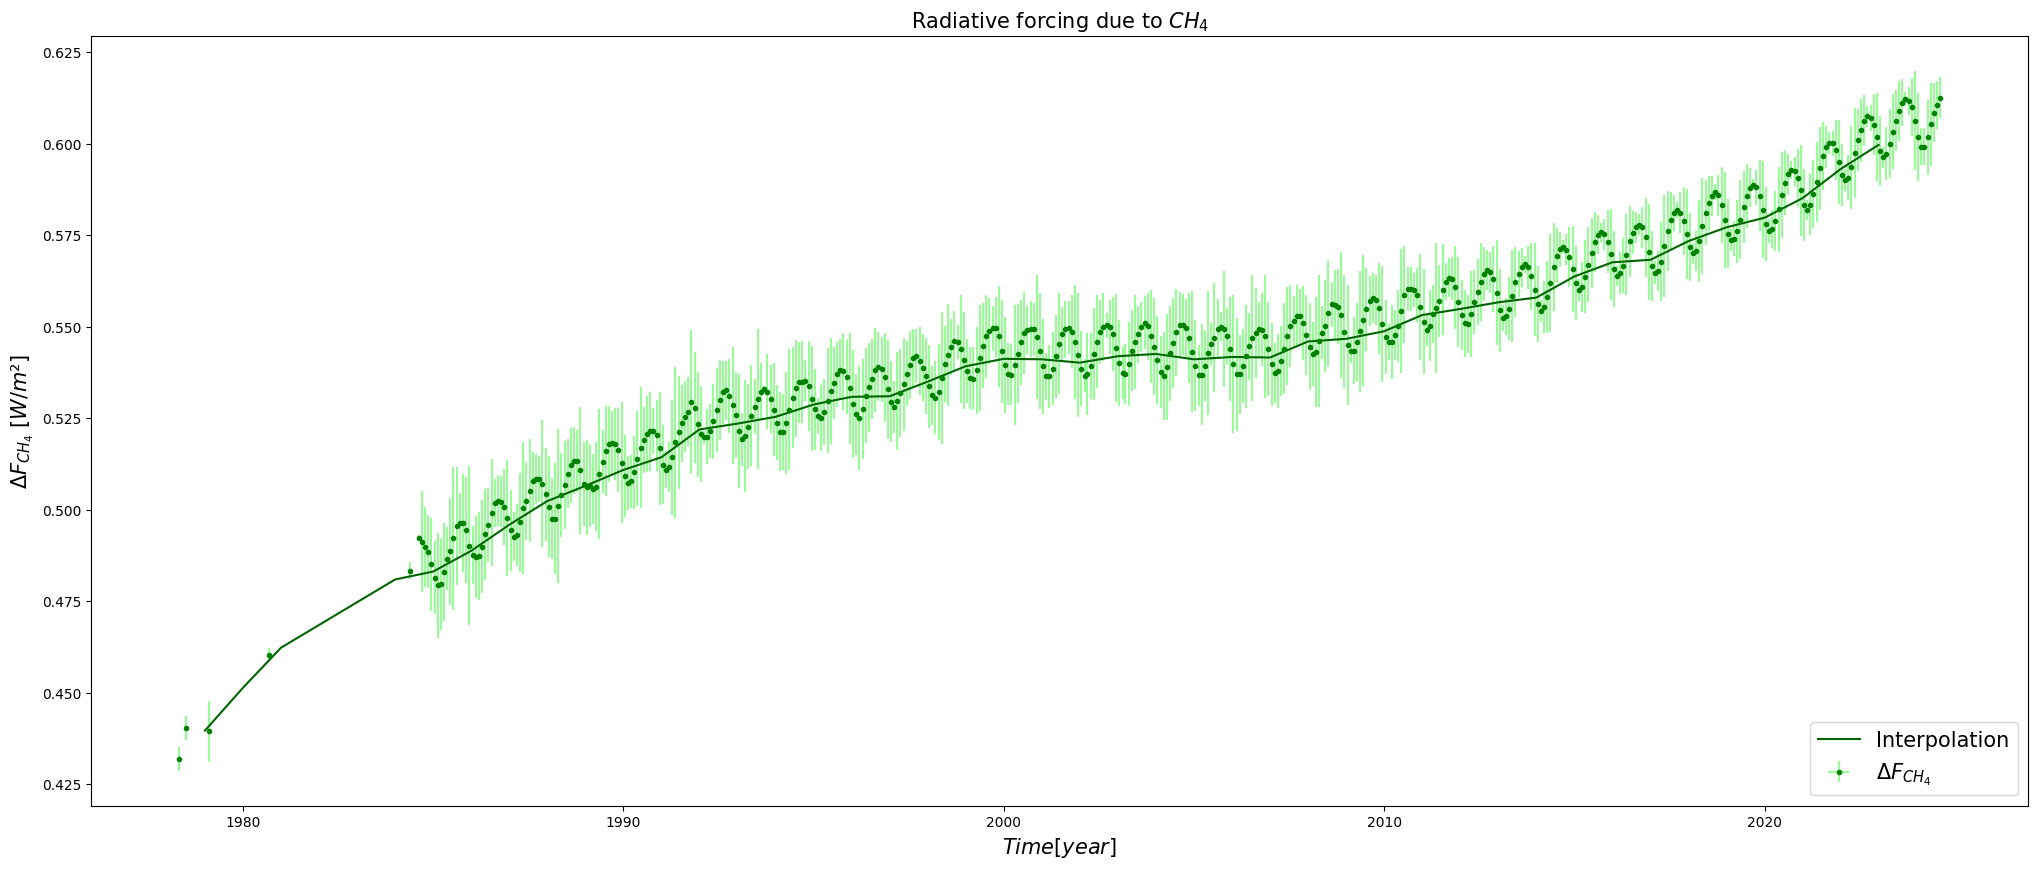

In [43]:
#Plotting radiative forcing due to CH4 

plt.figure(figsize=(25,10))

plt.title(r"Radiative forcing due to $CH_4$", fontsize = 15)
plt.ylabel(r"$\Delta F_{CH_4}$ [$W/m²$]", fontsize = 15)
plt.xlabel(r"$Time [year]$", fontsize = 15)
plt.errorbar(ch4_time, deltaf_ch4, std_deltaf_ch4, 0, marker = ".", linestyle = " ", ecolor="palegreen", 
             color = "green", label = r"$\Delta F_{CH_4}$" )
plt.plot(time_int, deltaf_ch4_new, color = "darkgreen", label = "Interpolation")

plt.legend(loc = 4, fontsize = 15)

plt.show()

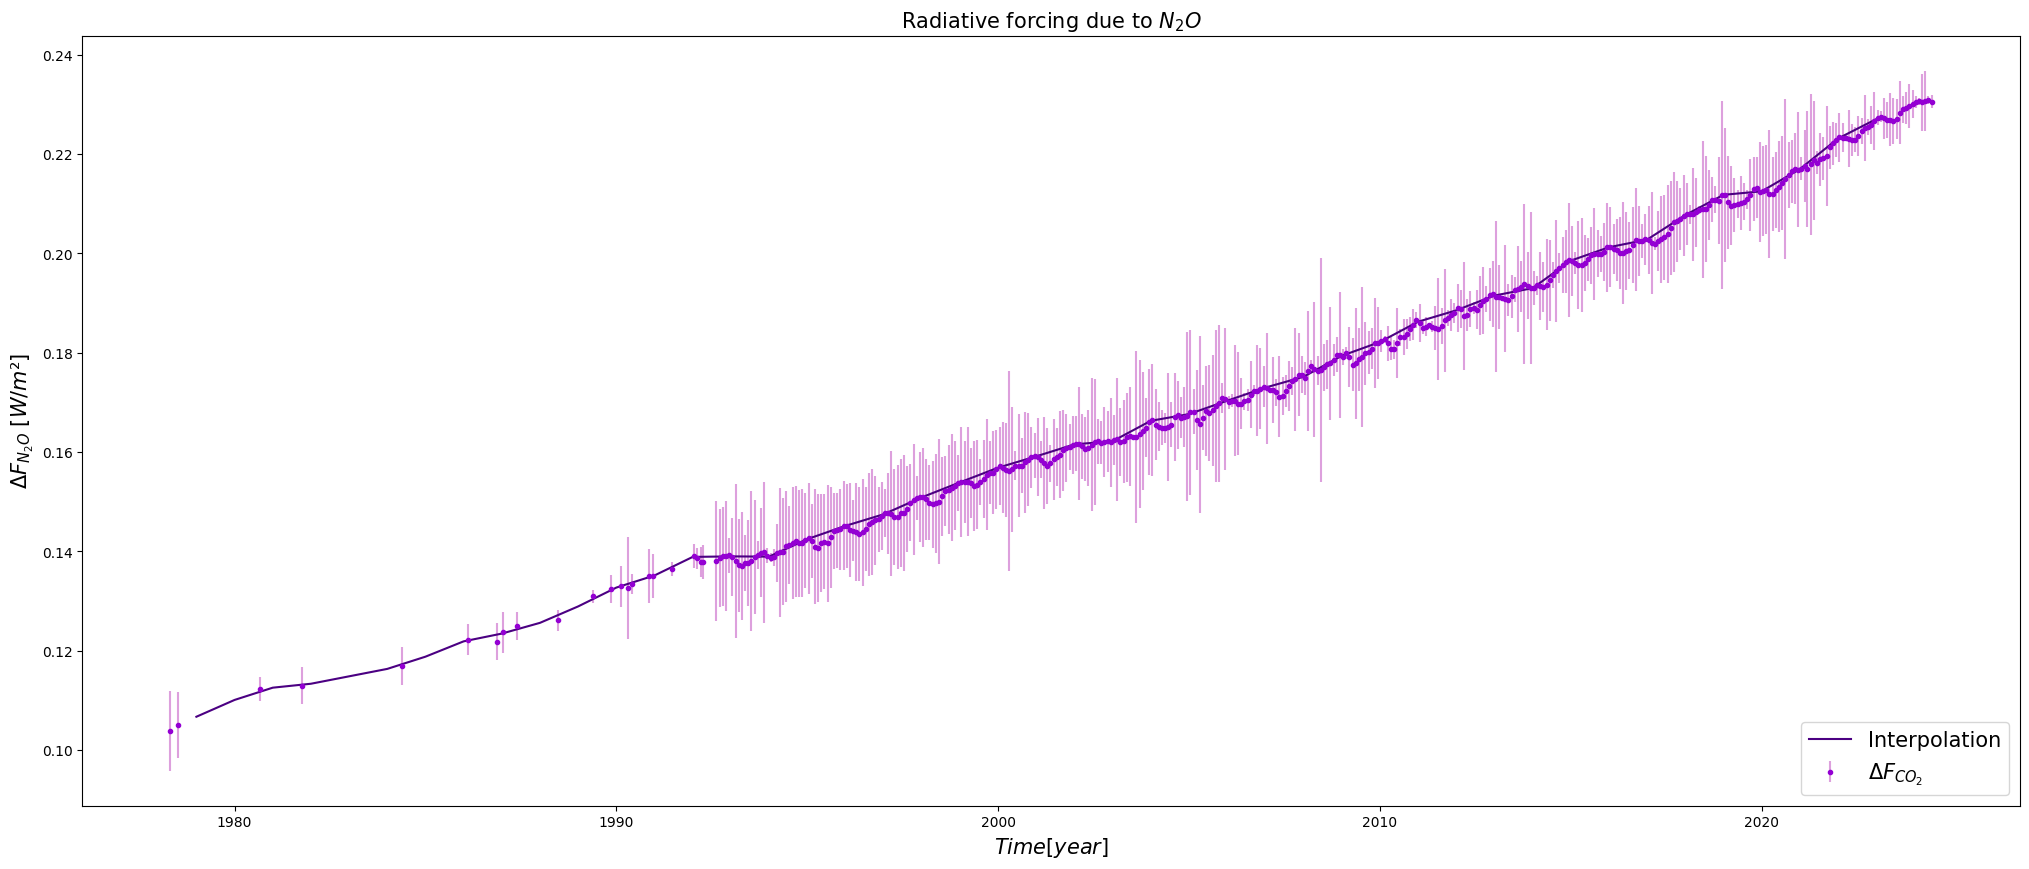

In [44]:
#Plotting radiative forcing due to N2O 

plt.figure(figsize=(25,10))

plt.title(r"Radiative forcing due to $N_2O$", fontsize = 15)
plt.ylabel(r"$\Delta F_{N_2O}$ [$W/m²$]", fontsize = 15)
plt.xlabel(r"$Time [year]$", fontsize = 15)

plt.errorbar(n2o_time, deltaf_n2o, std_deltaf_n2o, marker = ".", linestyle = " ", ecolor="plum", 
             color = "darkviolet", label = r"$\Delta F_{CO_2}$" )
plt.plot(time_int, deltaf_n2o_new, color = "indigo", label = "Interpolation")

plt.legend(loc = 4, fontsize = 15)

plt.show()

(e) Finally, use the interpolated data to calculate the **total radiative forcing** ($\Delta F_{\rm total}=\Delta F_{\text{CO}_2}+\Delta F_{\text{CH}_4}+\Delta F_{\text{N}_2\text{O}}$). Report the result in a high-quality, labeled plot of $\Delta F_{\rm global}$ (in $\rm W/m^2$) versus time in years.

In [45]:
# Calculate the total radiative forcing

deltaf_total = deltaf_co2_new + deltaf_ch4_new +deltaf_n2o_new

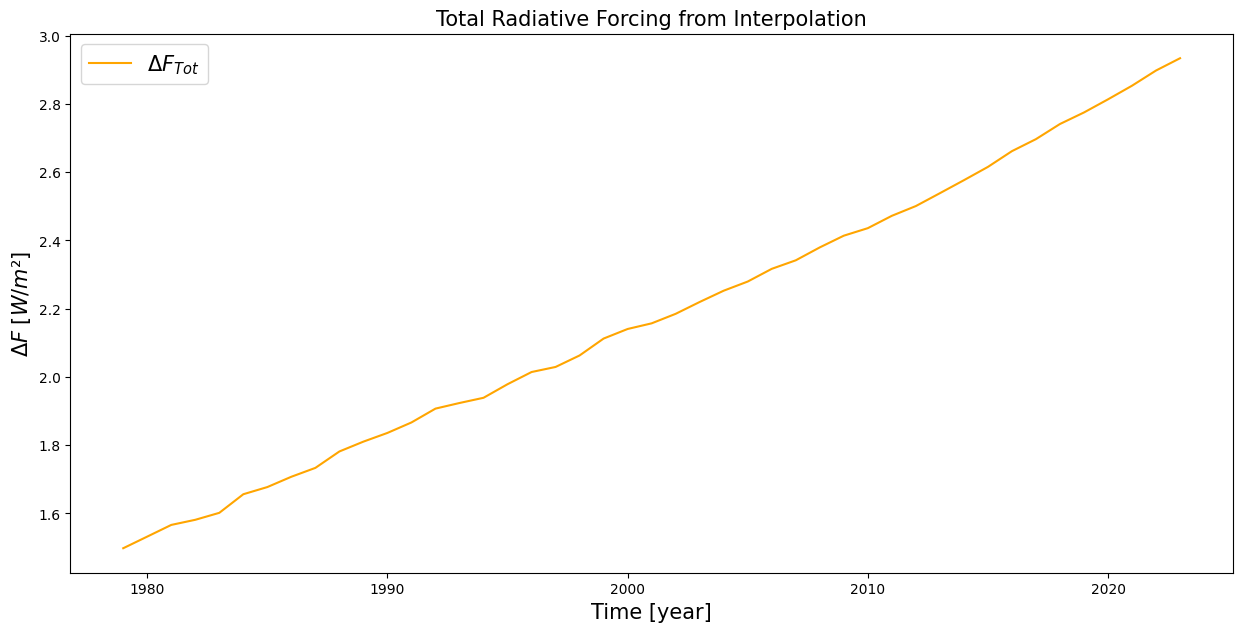

In [46]:
#Plotting total radiative forcing 

plt.figure(figsize=(15,7))

plt.title(r"Total Radiative Forcing from Interpolation", fontsize = 15)
plt.ylabel(r"$\Delta F$ [$W/m²$]", fontsize = 15)
plt.xlabel(r"Time [year]", fontsize = 15)

plt.plot(time_int, deltaf_total, linestyle = "-",color = "orange", label = r"$\Delta F_{Tot}$")


plt.legend(loc = 0, fontsize = 15)

plt.show()

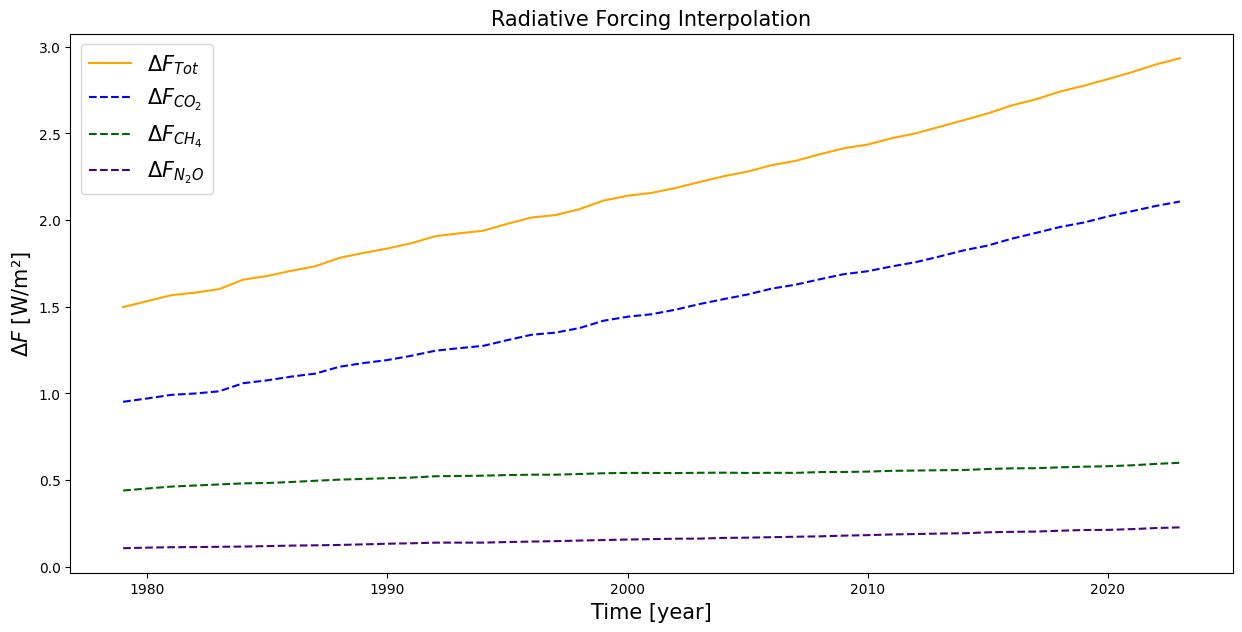

In [47]:
#Plotting total radiative forcing comparison

plt.figure(figsize=(15,7))

plt.title(r"Radiative Forcing Interpolation", fontsize = 15)
plt.ylabel(r"$\Delta F$ [W/m²]", fontsize = 15)
plt.xlabel(r"Time [year]", fontsize = 15)

plt.plot(time_int, deltaf_total, linestyle = "-",color = "orange", label = r"$\Delta F_{Tot}$")
plt.plot(time_int, deltaf_co2_new, color = "b", linestyle = "--", label = r"$\Delta F_{CO_2}$")
plt.plot(time_int, deltaf_ch4_new, color = "darkgreen", linestyle = "--", label = r"$\Delta F_{CH_4}$")
plt.plot(time_int, deltaf_n2o_new, color = "indigo", linestyle = "--", label = r"$\Delta F_{N_2O}$")


plt.legend(loc = 0, fontsize = 15)

plt.show()

## Problem 3. (6 points) Extrapolation: Global Warming

In this problem, you will study the correlation between the total radiative forcing ($\Delta F_{\rm total}$) and the sea temperature anomaly, which is an indicator of global warming. The sea temperature anomaly ($\Delta T_{\rm sea}$ in $\rm ^{\circ}C$) is measured with respect to the average global sea surface temperature (SST) in the 1961-1990 period ($=13.97\,\rm ^{\circ}C$). The observed data values are reported in this file:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/temperature-anomaly.csv

The file was taken from: https://ourworldindata.org

### Tasks:

(a) Create a python function that reads in the **temperature-anomaly.csv** file, selects the rows corresponding to the "Southern Hemisphere" anomaly, and returns the median temperature anomaly and symmetric $2\sigma$ y-errors computed from the upper and lower bounds given in the file. **Hint:** to calculate the symmetric $2\sigma$ y-errors, you can read the columns "Upper bound (95% CI)" and "Lower bound (95% CI)" and then average them.

(b) Make a high-quality, labeled figure of the sea temperature anomaly (in $\rm ^{\circ}C$) versus time (in years), including the symmetric $2\sigma$ y-errors for the temperature anomaly. What trend/s do you see? Briefly comment.

(c) Since you want to study the correlation between the global radiative forcing ($\Delta F_{\rm total}$) from problem 2 and the sea temperature anomaly, both series need to cover the same time period in years. Use conditionals to select only the overlapping time periods, so that both data frames cover the same time ranges. Then, create and export (in CSV format) a new pandas data frame that contains 4 columns:

- Year

- Total radiative forcing ($\Delta F_{\rm total}$)

- Sea temperature anomaly 

- $2\sigma$ error in the sea temperature anommaly


(d) Make a labeled scatter plot (using markers) of the sea temperature anomaly (including the $2\sigma$ y-error bars) versus the total radiative forcing ($\Delta F_{\rm total}$. What trend/s do you see?

(e) Assume a linear model and carry out a regression. Report the resulting equation and figure showing the original data, the linear fit, and the literature prediction line: $\Delta T_{\rm sea}=k\,\Delta F_{\rm total}$, where $k=0.29\pm0.08\,\rm ^{\circ}C\,m^2/W$. How well does your regression result compare to the literature? Briefly discuss your results.

(f) Finally, you will make predictions for the future. Imagine the observed trends in greenhouse concentrations will continue in the next years. Use your regression model to predict $\Delta T_{\rm sea}$ in the years $2050$ and $2100$ via extrapolation. Report your results with uncertainties and show the expected trends in a figure. How much will the sea temperature have increased by those two years with respect to the reference SST?

## Solution

(a) Create a python function that reads in the **temperature-anomaly.csv** file, selects the rows corresponding to the "Southern Hemisphere" anomaly, and returns the median temperature anomaly and symmetric $2\sigma$ y-errors computed from the upper and lower bounds given in the file. **Hint:** to calculate the symmetric $2\sigma$ y-errors, you can read the columns "Upper bound (95% CI)" and "Lower bound (95% CI)" and then average them.

In [48]:
def read_data_p3(path):
    """
    Function to extract two columns of a data file (.csv)
    Input: 
        path: directory of the file to read the data 
    Outputs: 
        med_temp: medain temperature anomaly corresponding to Southern Hemisphere (1D array, float)
        time_temp: time information corresponding to Southern Hemisphere (1D array, float)
        std2_sym: standard deviation corresponding to Southern Hemisphere (1D array, float)
    Author: Alan Palma
    """
    data_sample = pd.read_csv(path, sep = ",") #Read in a pandas object
    data_needed = data_sample[data_sample["Entity"]=="Southern Hemisphere"] #Select the data forSouthern Hemisphere"

    keys = data_needed.keys() #Extract the kesy

    med_temp = np.array(data_needed[keys[3]], dtype = float) 
    time_temp = np.array(data_needed[keys[2]], dtype = float) 

    # upper = np.array(data_needed[keys[4]])
    # lower = np.array(data_needed[keys[5]])

    #Compute the symmetric 2sigma errors
    std2_sym = np.array((data_needed[keys[4]]-data_needed[keys[5]])/2, dtype = float)

    return med_temp, time_temp, std2_sym

In [49]:
#Define the path

path_temp = "temperature-anomaly.csv"

#Call the fuction

med_temp, time_temp, std_temp = read_data_p3(path_temp) 

#print(med_temp.shape, std_temp.shape, time_temp[0], time_temp[-1])

(b) Make a high-quality, labeled figure of the sea temperature anomaly (in $\rm ^{\circ}C$) versus time (in years), including the symmetric $2\sigma$ y-errors for the temperature anomaly. What trend/s do you see? Briefly comment.

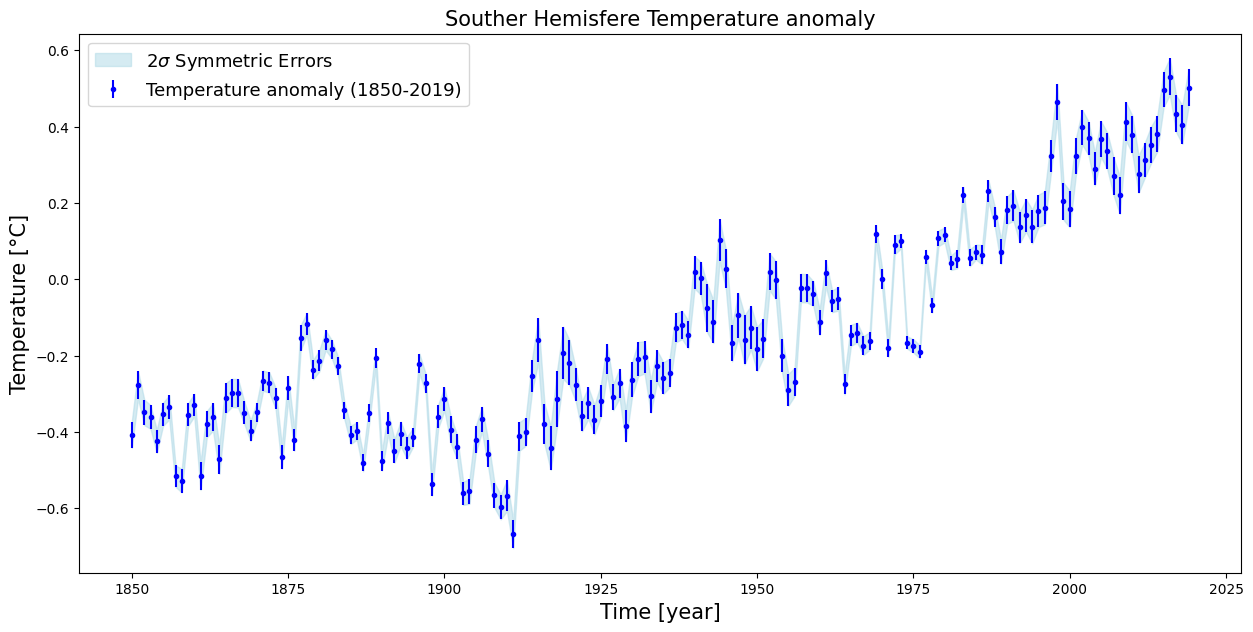

In [50]:
#Plotting total radiative forcing 

plt.figure(figsize=(15,7))

plt.title(r"Souther Hemisfere Temperature anomaly", fontsize = 15)
plt.ylabel(r"Temperature [°C]", fontsize = 15)
plt.xlabel(r"Time [year]", fontsize = 15)

plt.errorbar(time_temp, med_temp, std_temp, color = "b", ecolor = "b",linestyle = " ", marker = ".", label = r"Temperature anomaly (1850-2019)")
#plt.plot(time_temp, med_temp, linestyle = "-", color = "blue", label = r"$\Delta F_{Tot}$")
# plt.plot(time_temp, upper, linestyle = "-", color = "gray", label = r"$\Delta F_{Tot}$")
# plt.plot(time_temp, lower, linestyle = "-", color = "gray", label = r"$\Delta F_{Tot}$")
plt.fill_between(time_temp, med_temp-std_temp, med_temp+std_temp, color = "lightblue", alpha =0.5, label = r"2$\sigma$ Symmetric Errors")



plt.legend(loc = 0, fontsize = 13)

plt.show()

The temperature trend appears to be relatively constant (with some peaks) until 1915, but then it increases more rapidly starting from 1960.

(c) Since you want to study the correlation between the global radiative forcing ($\Delta F_{\rm total}$) from problem 2 and the sea temperature anomaly, both series need to cover the same time period in years. Use conditionals to select only the overlapping time periods, so that both data frames cover the same time ranges. Then, create and export (in CSV format) a new pandas data frame that contains 4 columns:

- Year

- Total radiative forcing ($\Delta F_{\rm total}$)

- Sea temperature anomaly 

- $2\sigma$ error in the sea temperature anommaly

In [51]:
#Select the years that matches

#Intersect time array and get the indices

time_intersect = np.intersect1d(time_int, time_temp, return_indices = True)

#Get the selected values for arrays

deltaf_total_pd = deltaf_total[time_intersect[1]]
med_temp_pd = med_temp[time_intersect[2]]
std_temp_pd = std_temp[time_intersect[2]]
time_pd = time_intersect[0]

#Create a pandas object


new_data = pd.DataFrame({"Year" : time_pd,
                         "Total radiative forcing [W/m^2]" : deltaf_total_pd,
                         "med_temp_pandas [°C]" : med_temp_pd,
                         "2sigma symmetric error" : std_temp_pd})


#Export the new data frame
new_data.to_csv("newest_data.csv", sep = ",",\
              float_format = "{:.4f}".format, index=False)

#print(time_intersect[1])
#print(deltaf_total_pandas)

(d) Make a labeled scatter plot (using markers) of the sea temperature anomaly (including the $2\sigma$ y-error bars) versus the total radiative forcing ($\Delta F_{\rm total}$. What trend/s do you see?

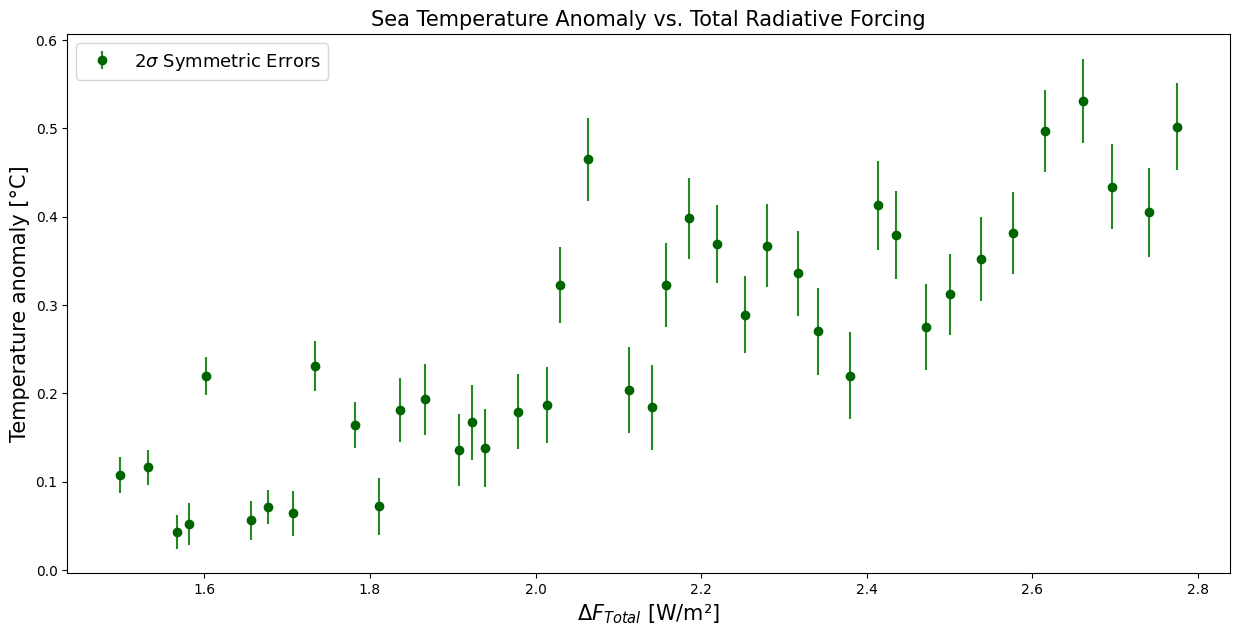

In [52]:
#Plotting

#Plotting total sea temperature anomaly vs total radiative forcing 

plt.figure(figsize=(15,7))

plt.title(r"Sea Temperature Anomaly vs. Total Radiative Forcing", fontsize = 15)
plt.ylabel(r"Temperature anomaly [°C]", fontsize = 15)
plt.xlabel(r"$\Delta F_{Total}$ [W/m²]", fontsize = 15)

plt.errorbar(deltaf_total_pd, med_temp_pd, std_temp_pd, color = "darkgreen", ecolor = "forestgreen",linestyle = " ", marker = "o", label = r"2$\sigma$ Symmetric Errors")


plt.legend(loc = 2, fontsize = 13)

plt.show()

In general, it is observed that the sea temperature anomaly increases linearly with the total radiative forcing.

(e) Assume a linear model and carry out a regression. Report the resulting equation and figure showing the original data, the linear fit, and the literature prediction line: $\Delta T_{\rm sea}=k\,\Delta F_{\rm total}$, where $k=0.29\pm0.08\,\rm ^{\circ}C\,m^2/W$. How well does your regression result compare to the literature? Briefly discuss your results.

In [53]:
#Using the linear model from Problem 1 (a*x +b)

coef3, cova3 = opt.curve_fit(model_1, deltaf_total_pd, med_temp_pd)

#Evaluate the model

deltaf_arr = np.linspace(deltaf_total_pd[0], deltaf_total_pd[-1], 500)

temp_model_linear1 = model_1(deltaf_arr, *coef3)


In [54]:
#Literature prediction model 

def model_linear(x, a):
    """
    Function to model a linear equation that cross the origin (a*x)
    Author: Alan Palma
    """
    return a*x

coef4, cova4 = opt.curve_fit(model_linear, deltaf_total_pd, med_temp_pd)

#Evaluate the model

temp_model_linear2 = model_linear(deltaf_arr, *coef4)

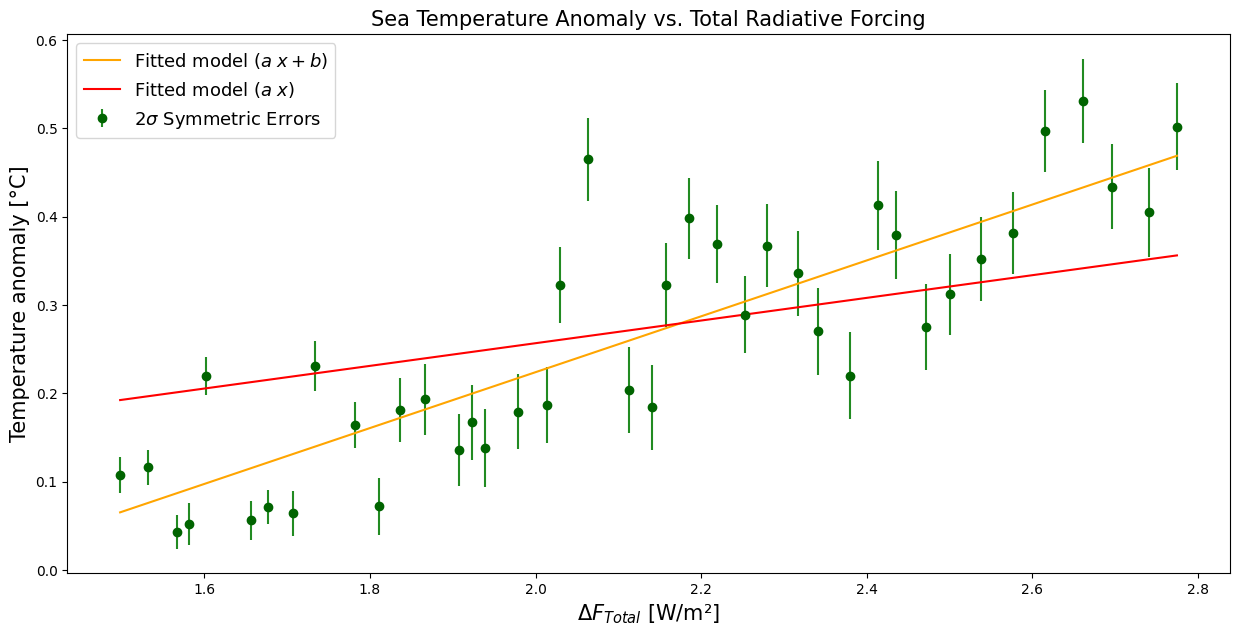

In [55]:
#Plotting

#Plotting total sea temperature anomaly vs total radiative forcing 

plt.figure(figsize=(15,7))

plt.title(r"Sea Temperature Anomaly vs. Total Radiative Forcing", fontsize = 15)
plt.ylabel(r"Temperature anomaly [°C]", fontsize = 15)
plt.xlabel(r"$\Delta F_{Total}$ [W/m²]", fontsize = 15)

plt.errorbar(deltaf_total_pd, med_temp_pd, std_temp_pd, color = "darkgreen", ecolor = "forestgreen",linestyle = " ", marker = "o", label = r"2$\sigma$ Symmetric Errors")
plt.plot(deltaf_arr, temp_model_linear1, color = "orange", label = r"Fitted model ($a\;x+b$)")
plt.plot(deltaf_arr, temp_model_linear2, color = "red", label = r"Fitted model ($a\;x$)")

plt.legend(loc = 2, fontsize = 13)

plt.show()


In [56]:
# Reporting the results of model fitting 

#a * x + b

print(f"The resulting fitted linear model 1 is: T = {'%.4f' % coef3[0]} * DeltaF {'%.4f' % coef3[1]}  ")
print(f"a = {'%.4f' % coef3[0]} +/- {'%.4f' % np.sqrt(np.diag(cova3)[0])}")
print(f"b = {'%.4f' % coef3[1]} +/- {'%.4f' % np.sqrt(np.diag(cova3)[1])} \n")

#a * x

print(f"The resulting fitted model considering errors is: T = {'%.4f' % coef4[0]} * DeltaF")
print(f"a = {'%.4f' % coef4[0]} +/- {'%.4f' % np.sqrt(np.diag(cova4)[0])} ")

The resulting fitted linear model 1 is: T = 0.3163 * DeltaF -0.4088  
a = 0.3163 +/- 0.0313
b = -0.4088 +/- 0.0671 

The resulting fitted model considering errors is: T = 0.1283 * DeltaF
a = 0.1283 +/- 0.0074 


In [57]:
#Ration between the literature prediction constant:

k = 0.29

print(f"Ration of slope form literature and predicted model 1: {k/coef3[0]}\n")
print(f"Ration of slope form literature and predicted model 2: {k/coef4[0]}")

Ration of slope form literature and predicted model 1: 0.9167706719404543

Ration of slope form literature and predicted model 2: 2.2597586476769385


The results show that linear model 1 ($a*x+b$) provides a better fit to the data than linear model 2 ($a*x$). In comparison with the constant $k$ from the literature, model 1 also offers a better approximation.

(f) Finally, you will make predictions for the future. Imagine the observed trends in greenhouse concentrations will continue in the next years. Use your regression model to predict $\Delta T_{\rm sea}$ in the years $2050$ and $2100$ via extrapolation. Report your results with uncertainties and show the expected trends in a figure. How much will the sea temperature have increased by those two years with respect to the reference SST?

#### Extrapolation using the Temperature and Time arrays

In [58]:
#Array to extrapolate 

time_arr2 = np.arange(2050., 2100., 0.5)

#Model fit 

coef5, cova5 = opt.curve_fit(model_1, time_temp, med_temp)

#Extrapolation

temp_vs_time1 = model_1(time_arr2, *coef5)


By propagation of errors,
For linear model ($a*t+b$): 

$$
\sigma_{T_{sea}} =\sqrt{\sigma_{a}² time²+ \sigma_{b}²}
$$



In [59]:
#Compute uncertaintes by propagation of errors

#Linear model 1

unc_a1 = np.sqrt(np.diag(cova5))[0]
unc_b = np.sqrt(np.diag(cova5))[1]

unc_model_ext1 = np.sqrt( (unc_a1*time_arr2)**2 + unc_b**2 )


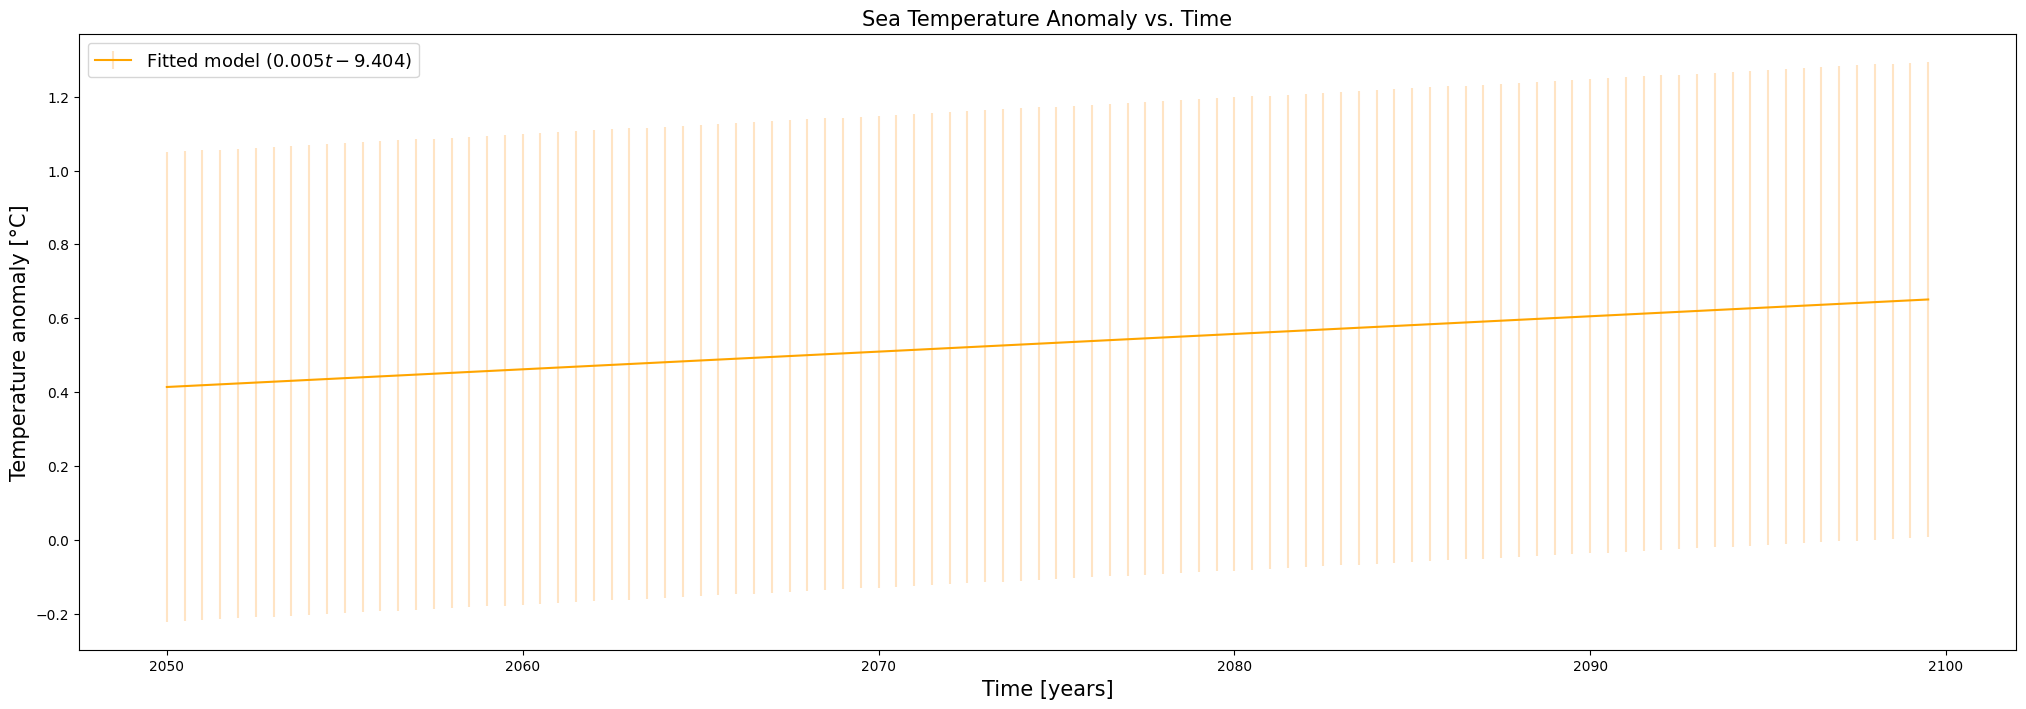

In [78]:
#Plotting total 

plt.figure(figsize=(25,8))

plt.title(r"Sea Temperature Anomaly vs. Time", fontsize = 15)
plt.ylabel(r"Temperature anomaly [°C]", fontsize = 15)
plt.xlabel(r"Time [years]", fontsize = 15)

plt.errorbar(time_arr2, temp_vs_time1 , unc_model_ext1, color = "orange", ecolor = "bisque", label = f"Fitted model (${'%.3f' % coef5[0]}t{'%.3f' % coef5[1]}$)")
# plt.plot(time_arr2, temp_vs_time1 + unc_model_ext1, color = "gray", linestyle = "--",  label = r"$+\sigma$")
# plt.plot(time_arr2, temp_vs_time1 - unc_model_ext1, color = "gray", linestyle = "--" , label = r"$-\sigma$")


plt.legend(loc = 2, fontsize = 13)

plt.show()

In [74]:
ref_SST = 13.97 

#At 2050 

t0 = ref_SST + temp_vs_time1[0]

#At 2100

t1 = ref_SST + temp_vs_time1[-1]

print(f"At 2025: {'%.3f' % t0}°C")
print(f"At 2100: {'%.3f' % t1}°C")
print(f"The temperature will have increased by {'%.3f' % temp_vs_time1[0]}°C to 2050 and {'%.3f' % temp_vs_time1[-1]}°C to 2100")

At 2025: 14.384°C
At 2100: 14.621°C
The temperature will have increased by 0.414°C to 2050 and 0.651°C to 2100


The model shown errors too high so let's try using the model made for temperature and radiativve forcing

#### Extrapolation using the model for Temperature vs. Radiative forcing 

In [61]:
#Let's use radiative force and time from problem 2 to create a model (a*t+b)

#Using function model1()

coef6, cova6 = opt.curve_fit(model_1, time_int, deltaf_total)

#Evaluate 

deltaf_tot_model = model_1(time_int, *coef6)

#print(coef6)

In [62]:
#Compute the uncertainties by propagation of errors same as the last one

unc_a2 = np.sqrt(np.diag(cova6))[0]
unc_b2 = np.sqrt(np.diag(cova6))[1]

unc_model_ext2 = np.sqrt( (unc_a2*time_int)**2 + unc_b2**2 )

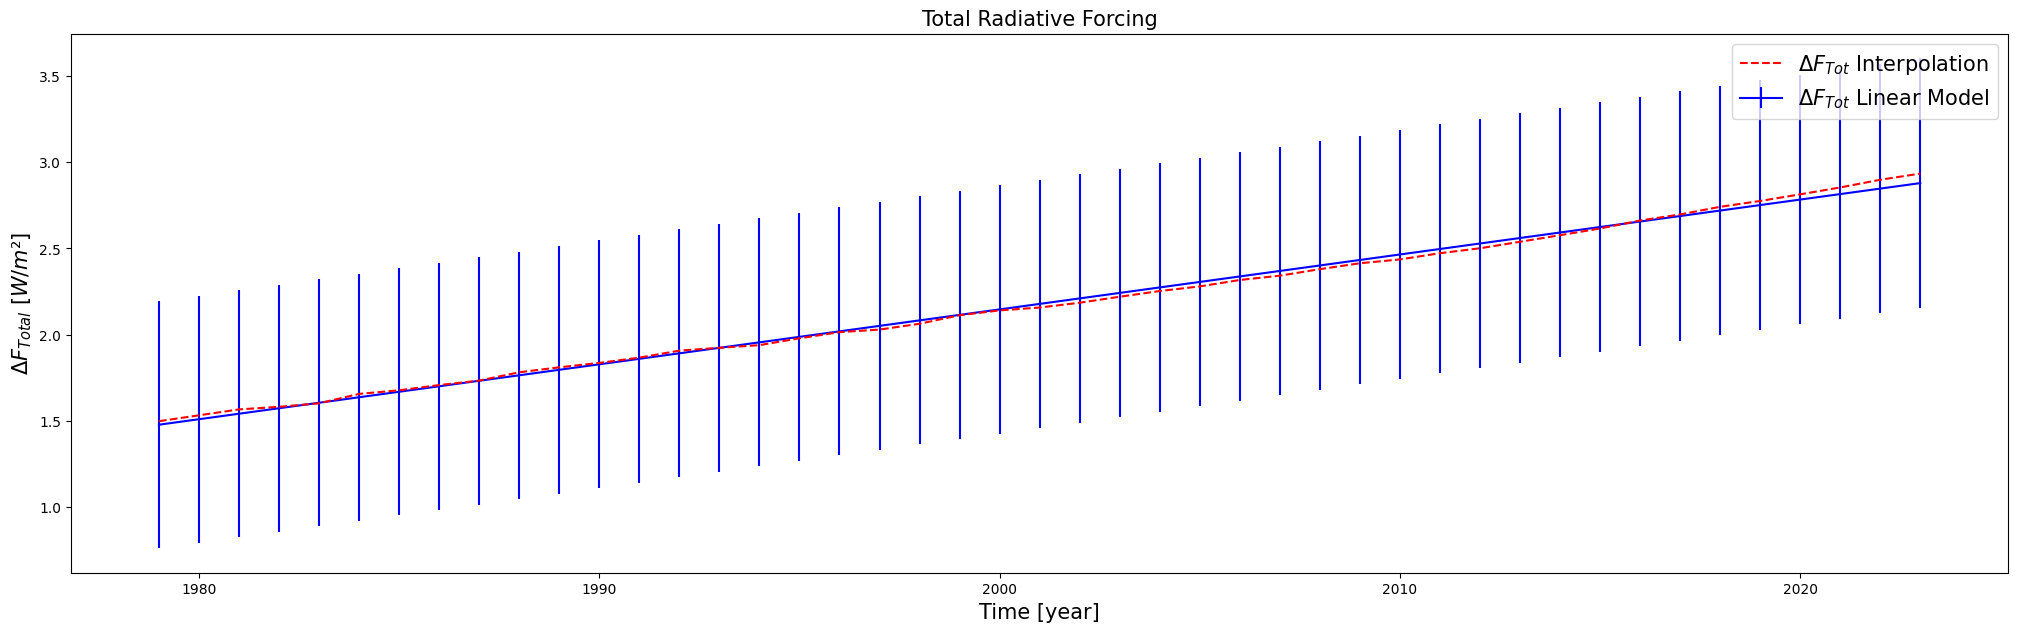

In [69]:
#Plotting to see the model

plt.figure(figsize=(25,7))

plt.title(r"Total Radiative Forcing", fontsize = 15)
plt.ylabel(r"$\Delta F_{Total}$ [$W/m²$]", fontsize = 15)
plt.xlabel(r"Time [year]", fontsize = 15)

plt.plot(time_int, deltaf_total, linestyle = "--",color = "red", label = r"$\Delta F_{Tot}$ Interpolation", zorder = 2)

plt.errorbar(time_int, deltaf_tot_model, unc_model_ext2 , linestyle = "-", color = "b", label = r"$\Delta F_{Tot}$ Linear Model", zorder = 1)
# plt.plot(time_int, deltaf_tot_model + unc_model_ext2, color = "gray", linestyle = "--",  label = r"$+\sigma$")
# plt.plot(time_int, deltaf_tot_model - unc_model_ext2, color = "gray", linestyle = "--" , label = r"$-\sigma$")


plt.legend(loc = 0, fontsize = 15)

plt.show()

Now let's put all together, the model will take the form: 

$$
\Delta T_{\rm sea}(t)=k\,\Delta F_{\rm total}(t),
$$

where $\Delta F_{\rm total}$ is also a linear function that depends on time.
Since the model $a*t+b$ shown better adjustment to $k$, it will be used to make the extrapolation.

$$
\Delta T_{\rm sea}(t)=k \, (a_{\Delta F} t + b_{\Delta F}) + b_{\Delta T_{\rm sea}},
$$



In [64]:
#Now let's put all together

#First evaluate radiative forcing on the time interval required

time_arr2 = np.arange(2050., 2100., 0.5)

deltaf_tot_extr = model_1(time_arr2, *coef6)

#Second evaluate the model for temperature with this last array for radiative force

temp_ext = model_1(deltaf_tot_extr, *coef3)

print(temp_ext.shape, time_arr2.shape)


(100,) (100,)


By propagation of errors we get the following expression for $\sigma_{\Delta T_{sea}}$:

$$
\sigma_{\Delta T_{\rm sea}} = \sqrt{(a_{\Delta F} t + b_{\Delta F})^2 \sigma_k^2 + (k t)^2 \sigma_{a_{\Delta F}}^2 + k^2 \sigma_{b_{\Delta F}}^2 + \sigma_{b_{\Delta T_{\rm sea}}}^2}
$$
, then
$$
\sigma_{\Delta T_{\rm sea}} = \sqrt{(\Delta F_{\rm total})^2 \sigma_k^2 + (k t)^2 \sigma_{a_{\Delta F}}^2 + k^2 \sigma_{b_{\Delta F}}^2 + \sigma_{b_{\Delta T_{\rm sea}}}^2}
$$

In [65]:
#Compute the uncertainty

sig_k = np.sqrt(np.diag(cova3)[0])
sig_bTemp = np.sqrt(np.diag(cova3)[1])

sig_aF = unc_a2 
sig_bF = unc_b2 

#Coefficients

k = coef3[0]
b_T = coef3[1]

a_F = coef6[0]
b_F = coef6[1]


sig_Tsea = np.sqrt( (deltaf_tot_extr)**2*sig_k**2 + (k*time_arr2*sig_aF)**2 
                   + (k*sig_bF)**2 + sig_bTemp**2)

#print(sig_Tsea.shape)

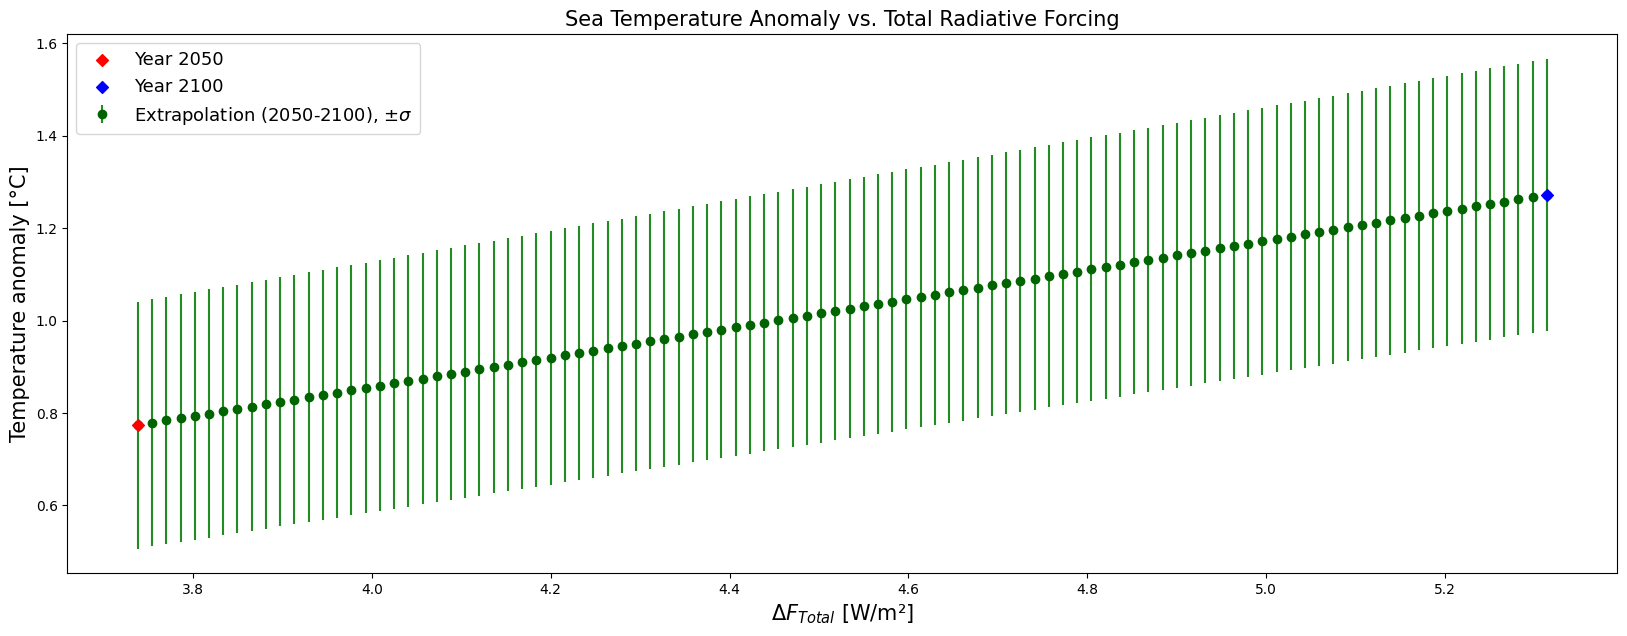

In [66]:
#Plotting total sea temperature anomaly vs total radiative forcing extrapolation

plt.figure(figsize=(20,7))

plt.title(r"Sea Temperature Anomaly vs. Total Radiative Forcing", fontsize = 15)
plt.ylabel(r"Temperature anomaly [°C]", fontsize = 15)
plt.xlabel(r"$\Delta F_{Total}$ [W/m²]", fontsize = 15)

plt.scatter(deltaf_tot_extr[0], temp_ext[0],  color = "red", marker = "D", label = "Year 2050", zorder = 2)
plt.scatter(deltaf_tot_extr[-1], temp_ext[-1], color = "b", marker = "D", label = "Year 2100", zorder = 2)
plt.errorbar(deltaf_tot_extr, temp_ext, sig_Tsea, color = "darkgreen", ecolor = "forestgreen",linestyle = " ", 
             marker = "o", label = r"Extrapolation (2050-2100), $\pm \sigma$", zorder = 1)

plt.legend(loc = 2, fontsize = 13)

plt.show()


In [73]:
ref_SST = 13.97 

#At 2050 

t_0 = ref_SST + temp_ext[0]

#At 2100

t_1 = ref_SST + temp_ext[-1]

print(f"At 2025: {'%.3f' % t_0}°C")
print(f"At 2100: {'%.3f' % t_1}°C")
print(f"The temperature will have increased by {'%.3f' % temp_ext[0]}°C to 2050 and {'%.3f' % temp_ext[-1]}°C to 2100")

At 2025: 14.744°C
At 2100: 15.242°C
The temperature will have increased by 0.774°C to 2050 and 1.272°C to 2100
